             X       Y          Z AA       Mass
0    23.388000 -19.139  -9.239000  M  149.20784
1    24.634001 -16.649  -6.582000  K  146.18934
2    23.024000 -14.147  -4.186000  A   89.09404
3    19.518999 -14.167  -2.949000  F  165.19184
4    20.761999 -13.862   0.649000  T  119.12034
..         ...     ...        ... ..        ...
205  -0.389000  -7.560   8.314000  V  117.14784
206  -1.093000  -4.358  10.287000  N  132.11904
207  -0.387000  -3.627  13.961000  Y  181.19124
208  -2.372000  -0.894  15.827000  Y  181.19124
209  -0.804000   1.196  18.641001  F  165.19184

[210 rows x 5 columns]
(210, 8)
        X        Y       Z AA   Avg_Mass   Avg_Neighbor_Dist  \
0  23.388  -19.139  -9.239  M  149.20784  3.8486709594726562   
1  24.634  -16.649  -6.582  K  146.18934   3.834369659423828   
2  23.024  -14.147  -4.186  A   89.09404  3.7685012817382812   
3  19.519  -14.167  -2.949  F  165.19184  3.7678961753845215   
4  20.762  -13.862   0.649  T  119.12034  3.8312950134277344   

    Ma

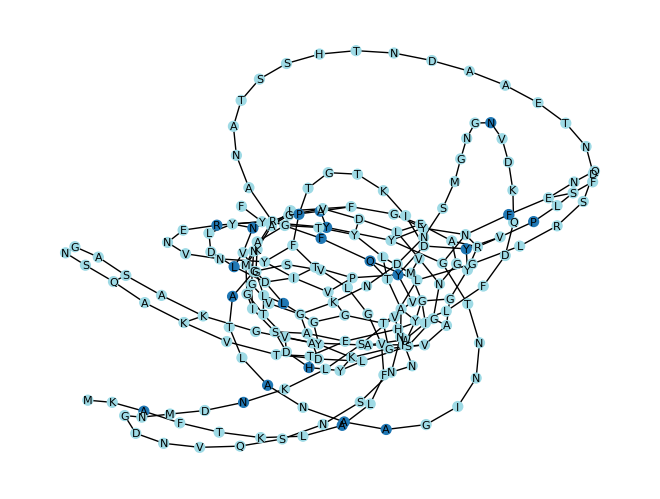

             X       Y          Z AA       Mass
0    23.388000 -19.139  -9.239000  M  149.20784
1    24.634001 -16.649  -6.582000  K  146.18934
2    23.024000 -14.147  -4.186000  A   89.09404
3    19.518999 -14.167  -2.949000  F  165.19184
4    20.761999 -13.862   0.649000  T  119.12034
..         ...     ...        ... ..        ...
205  -0.389000  -7.560   8.314000  V  117.14784
206  -1.093000  -4.358  10.287000  N  132.11904
207  -0.387000  -3.627  13.961000  Y  181.19124
208  -2.372000  -0.894  15.827000  Y  181.19124
209  -0.804000   1.196  18.641001  F  165.19184

[210 rows x 5 columns]
(210, 9)
        X        Y       Z AA   Avg_Mass   Avg_Neighbor_Dist  \
0  23.388  -19.139  -9.239  M  149.20784  3.8486709594726562   
1  24.634  -16.649  -6.582  K  146.18934   3.834369659423828   
2  23.024  -14.147  -4.186  A   89.09404  3.7685012817382812   
3  19.519  -14.167  -2.949  F  165.19184  3.7678961753845215   
4  20.762  -13.862   0.649  T  119.12034  3.8312950134277344   

    Ma

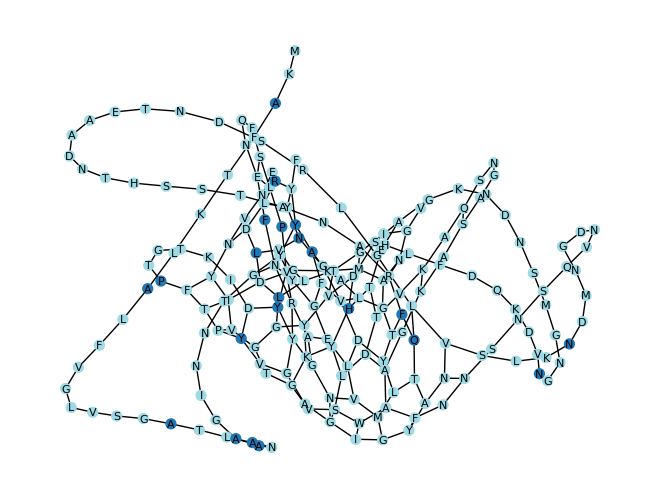

In [1]:
# Import necessary libraries
import os
import pandas as pd
from ProteinAnalyzer import ProteinAnalyzer
from GraphCreator import *
import torch
from torch_geometric.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.nn as nn
from torch_geometric.nn import GCNConv, global_mean_pool
import torch.nn as nn

import torch.optim as optim
#from GraphVAE import GraphVAE

pdb_file = '/Users/alexchilton/Downloads/archive/train/AF-D0ZA02-F1-model_v4.pdb'
aa_info_file = 'aa_mass_letter.csv'
analyzer = ProteinAnalyzer(pdb_file, aa_info_file)
graph_creator = GraphCreator(pdb_file, aa_info_file)

# Generate the autoencoder input DataFrame
autoencoder_input_df = analyzer.prepare_autoencoder_input()
# Example usage:
# graph_creator = GraphCreator(pdb_file, aa_info_file)
autoencoder_input_df, le = graph_creator.encode_aa(autoencoder_input_df)
pd.set_option('display.max_columns', None)

print(autoencoder_input_df.shape)
print(autoencoder_input_df.head())

# Unpack the returned tuple
graph = graph_creator.create_graph(autoencoder_input_df)

# Print graph metrics
graph_creator.print_graph_metrics(graph)

# Draw the graph
graph_creator.draw_graph(graph, le)

In [2]:
from sklearn.preprocessing import LabelEncoder

def load_pdb_files(directory):
    pdb_files = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.pdb')]
    return pdb_files

def create_autoencoder_input_dfs(pdb_files, aa_info_file):
    autoencoder_input_dfs = []
    for pdb_file in pdb_files:
        analyzer = ProteinAnalyzer(pdb_file, aa_info_file)
        autoencoder_input_df = analyzer.prepare_autoencoder_input()
        autoencoder_input_dfs.append(autoencoder_input_df)
    return autoencoder_input_dfs

def encode_aa_fields(autoencoder_input_dfs):
    le = LabelEncoder()
    all_labels = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
    le.fit(all_labels)

    for df in autoencoder_input_dfs:
        if 'AA' in df.columns:
            df['AA_encoded'] = le.transform(df['AA'])
        else:
            print("Key 'AA_labels' not found in the DataFrame")
    return autoencoder_input_dfs

# Directory containing PDB files
pdb_directory = '/Users/alexchilton/Downloads/archive/just100'
aa_info_file = 'aa_mass_letter.csv'

# Load PDB files
pdb_files = load_pdb_files(pdb_directory)

# Create autoencoder input DataFrames
autoencoder_input_dfs = create_autoencoder_input_dfs(pdb_files, aa_info_file)

# Encode the amino acid fields
encoded_autoencoder_input_dfs = encode_aa_fields(autoencoder_input_dfs)

# Print the first few rows of the first encoded DataFrame
print(encoded_autoencoder_input_dfs[0].head())

         X      Y       Z AA       Mass
0   -3.361  0.103   5.039  I  131.17464
1   -0.566 -2.557   5.206  I  131.17464
2   -1.398 -3.989   1.720  E  147.13074
3   -1.416 -0.429   0.246  K  146.18934
4    1.985  0.279   1.908  L  131.17464
5    3.484 -3.071   0.728  V  117.14784
6    2.124 -2.571  -2.836  N  132.11904
7    3.463  1.055  -2.853  T  119.12034
8    6.910 -0.168  -1.670  A   89.09404
9    6.932 -3.113  -4.147  L  131.17464
10   5.683 -0.697  -6.877  G   75.06714
11   8.570  1.760  -6.183  L  131.17464
12  11.161 -1.090  -6.155  L  131.17464
13   9.714 -2.762  -9.317  S  105.09344
14  10.170  0.130 -11.838  G   75.06714
15   8.169  3.306 -11.184  L  131.17464
         X      Y      Z AA       Mass
0   13.000 -1.172 -7.426  F  165.19184
1   10.319 -3.992 -7.708  V  117.14784
2   10.134 -4.877 -3.913  P  115.13194
3    8.848 -1.383 -2.858  L  131.17464
4    5.424 -1.893 -4.558  L  131.17464
5    5.032 -5.427 -3.097  V  117.14784
6    5.356 -3.993  0.466  S  105.09344
7    2.0

In [3]:
le = LabelEncoder()
all_labels = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
le.fit(all_labels)

LabelEncoder()

Graph 1: 16 nodes, 32 edges


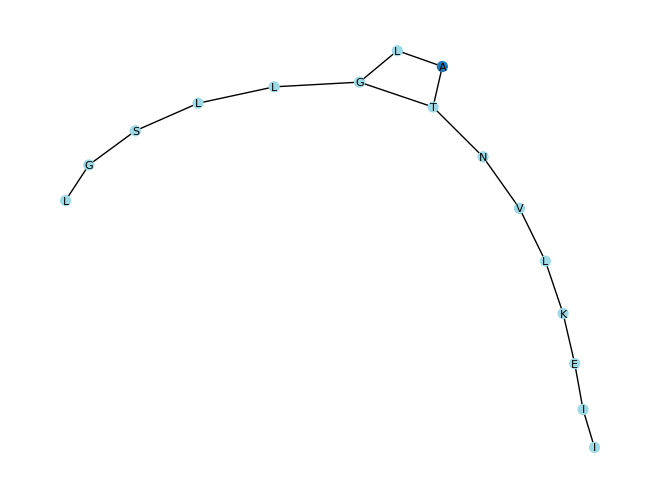

Graph 2: 17 nodes, 34 edges


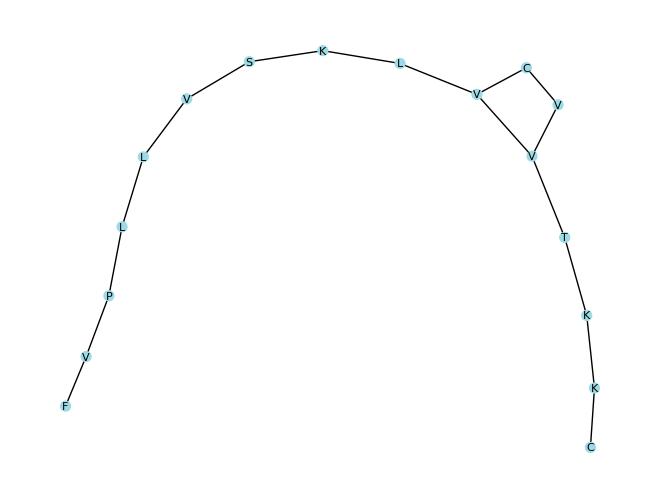

Graph 3: 17 nodes, 32 edges


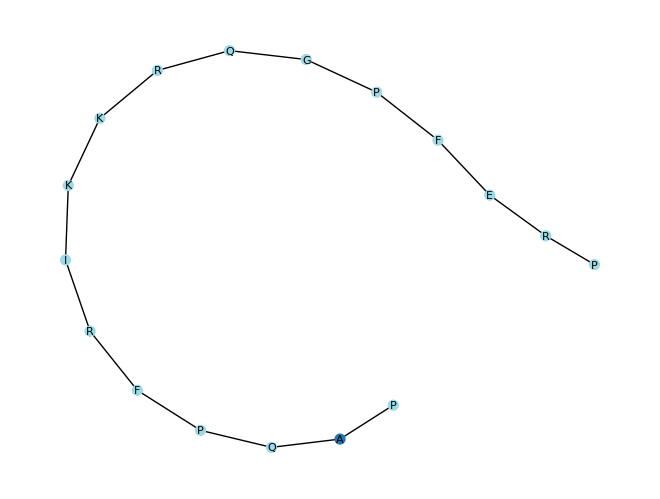

Graph 4: 21 nodes, 42 edges


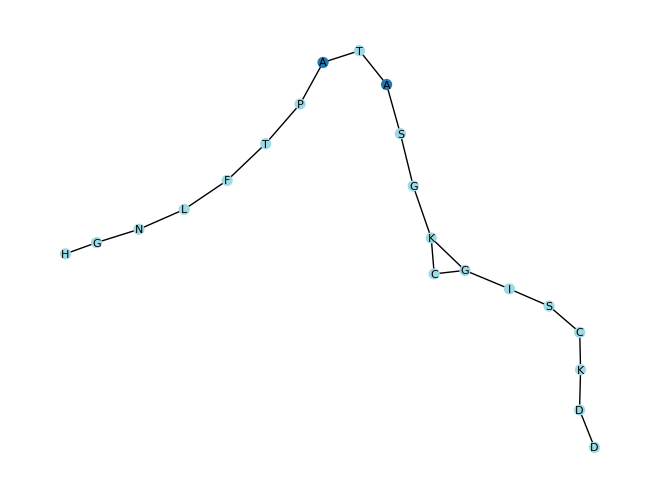

Graph 5: 17 nodes, 34 edges


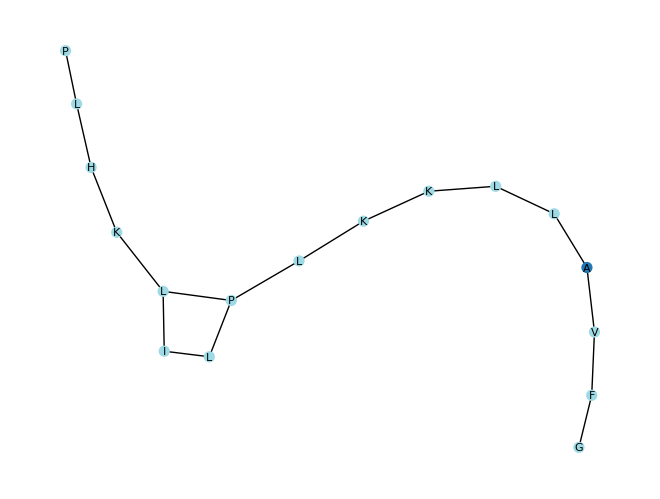

Graph 6: 20 nodes, 38 edges


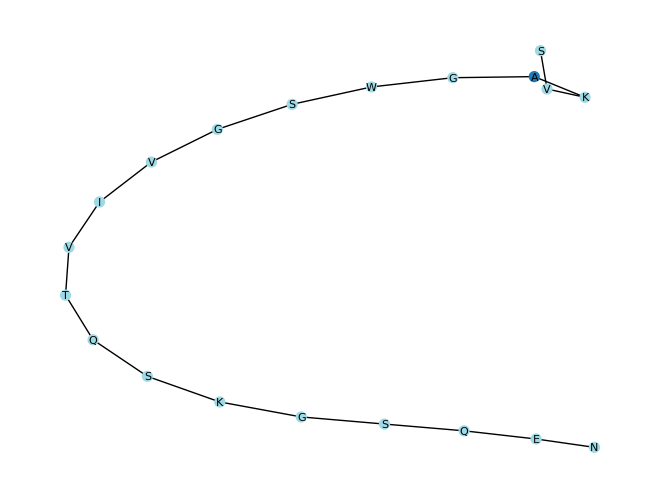

Graph 7: 16 nodes, 32 edges


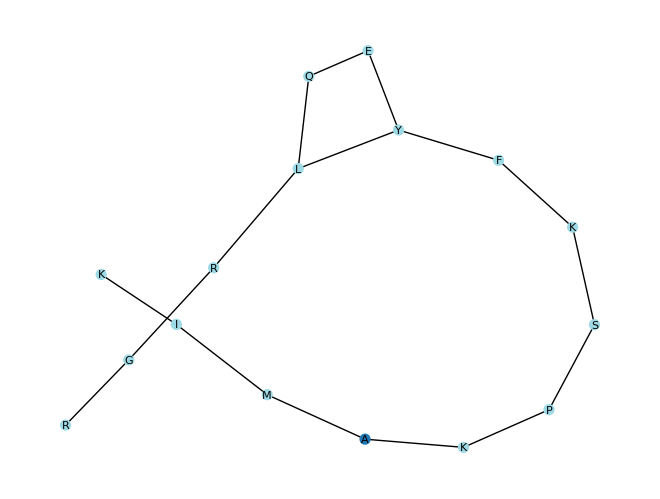

Graph 8: 17 nodes, 32 edges


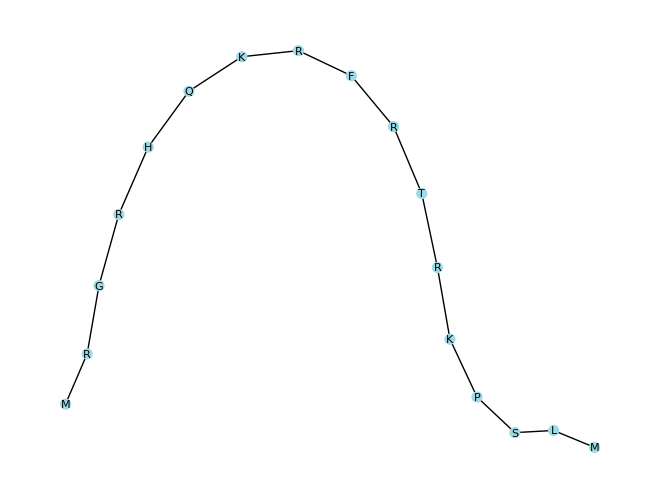

Graph 9: 17 nodes, 34 edges


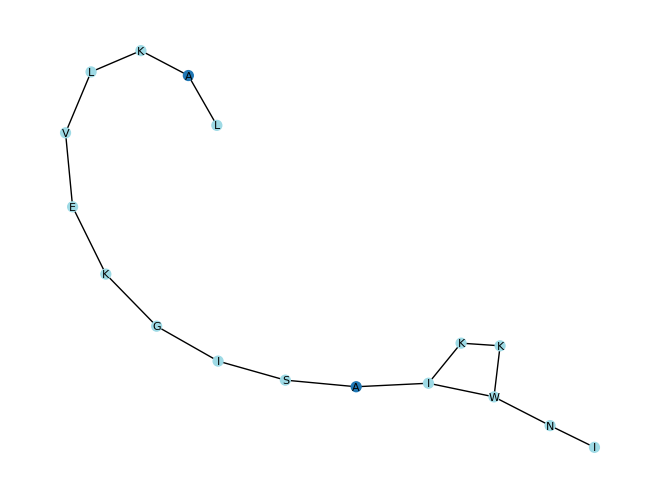

Graph 10: 16 nodes, 32 edges


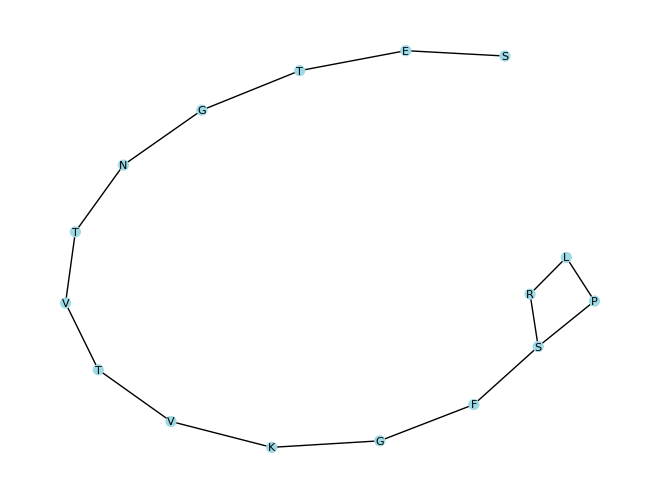

Graph 11: 18 nodes, 34 edges


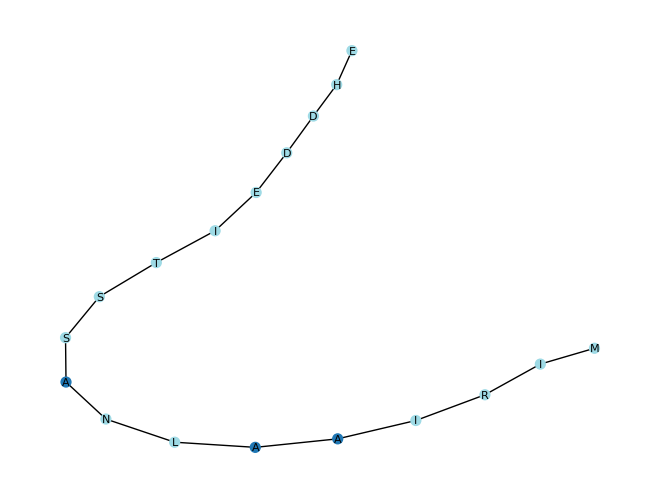

Graph 12: 20 nodes, 40 edges


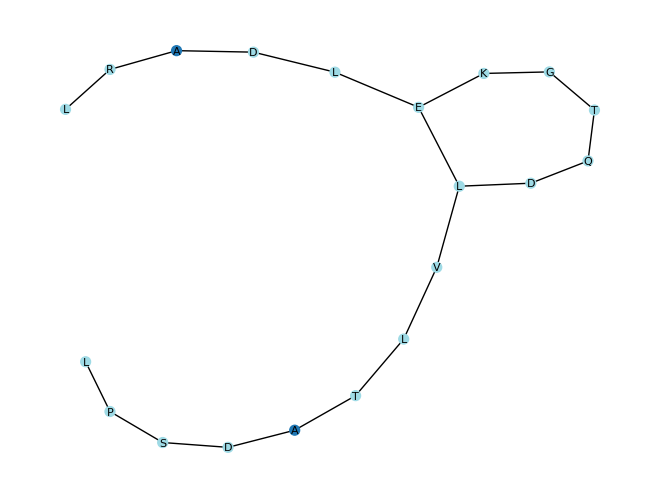

Graph 13: 17 nodes, 32 edges


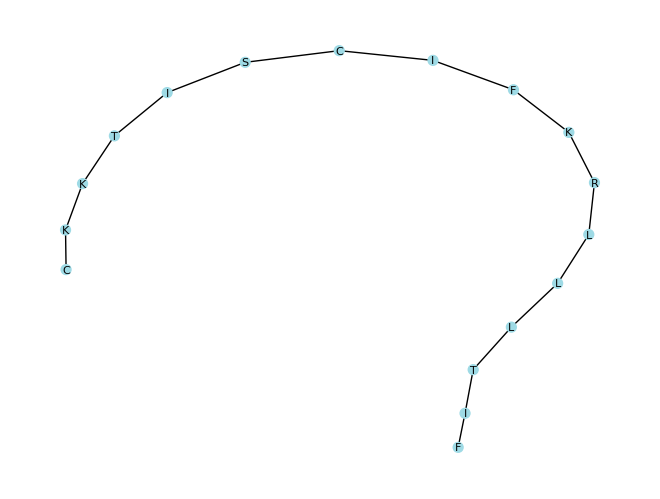

Graph 14: 16 nodes, 32 edges


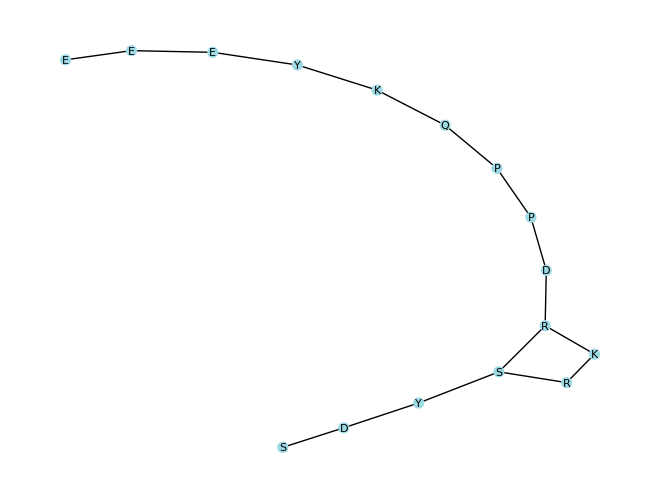

Graph 15: 20 nodes, 38 edges


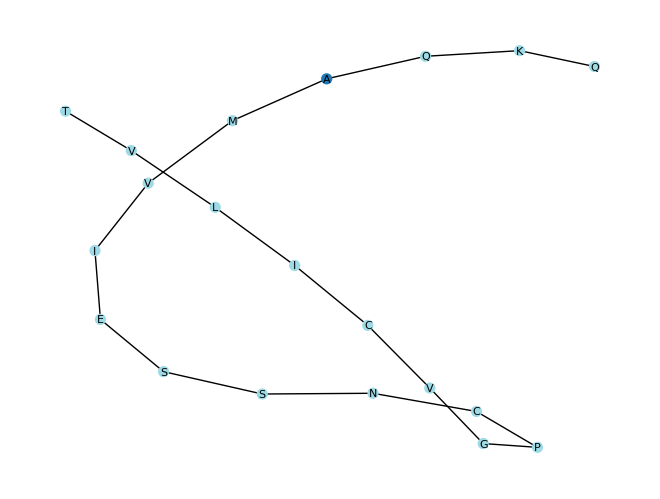

Graph 16: 17 nodes, 32 edges


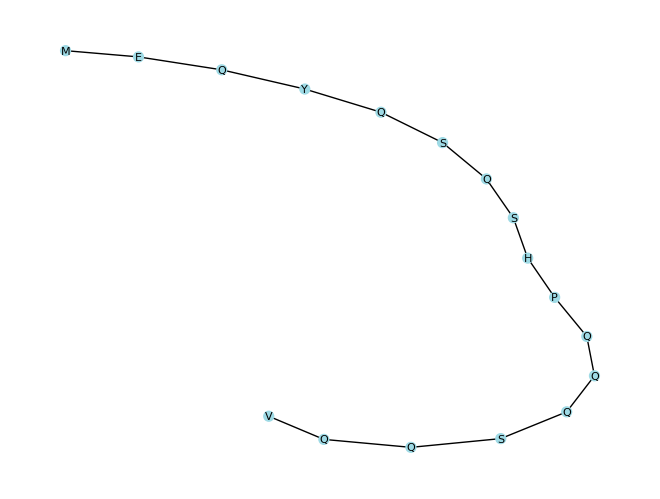

Graph 17: 17 nodes, 32 edges


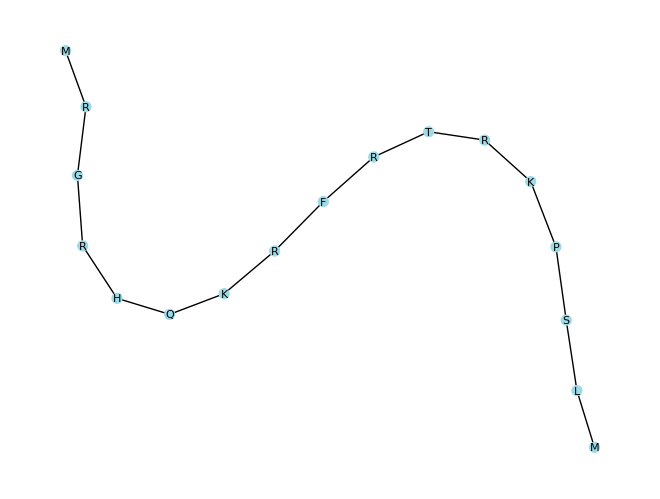

Graph 18: 18 nodes, 34 edges


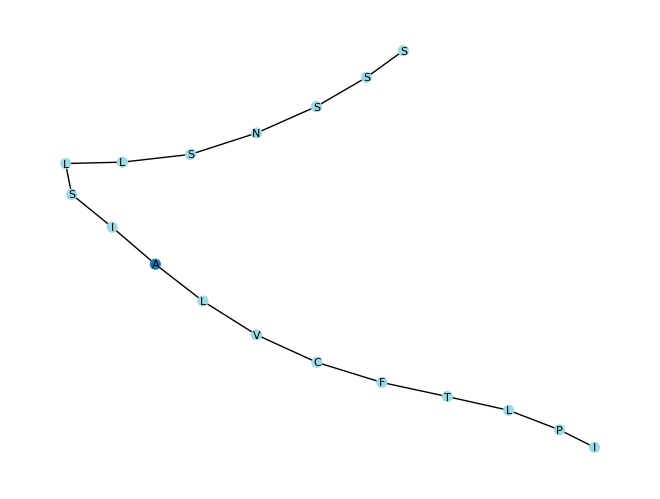

Graph 19: 16 nodes, 36 edges


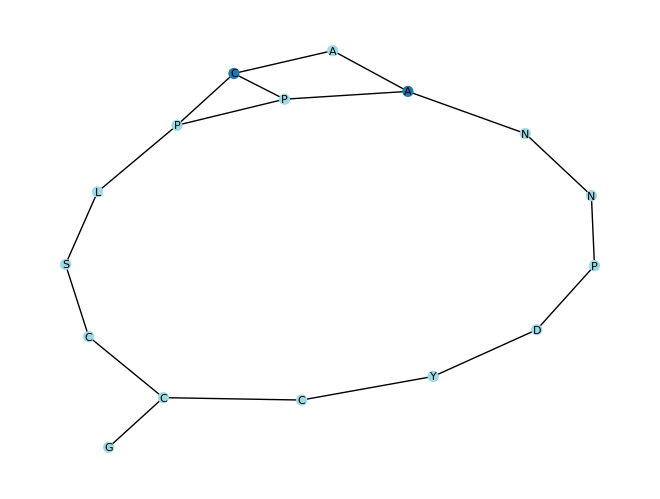

Graph 20: 17 nodes, 32 edges


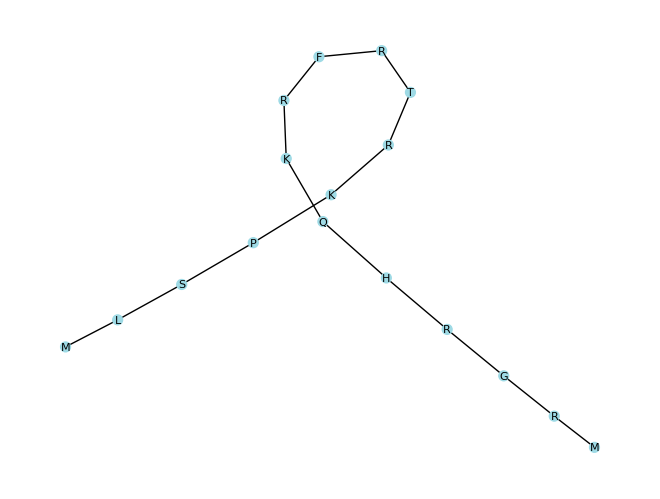

Graph 21: 20 nodes, 38 edges


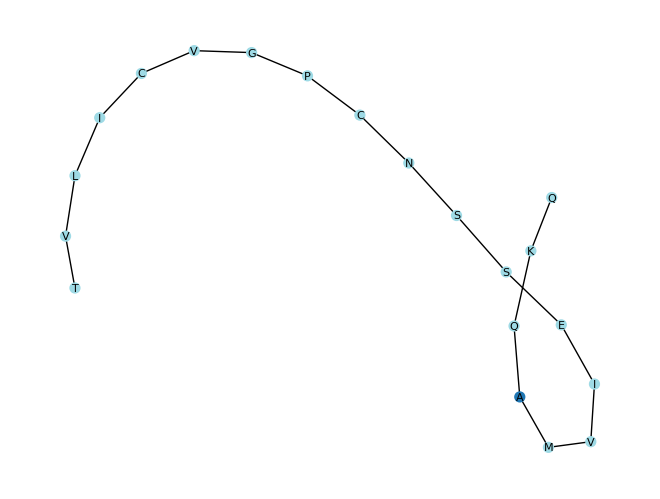

Graph 22: 18 nodes, 34 edges


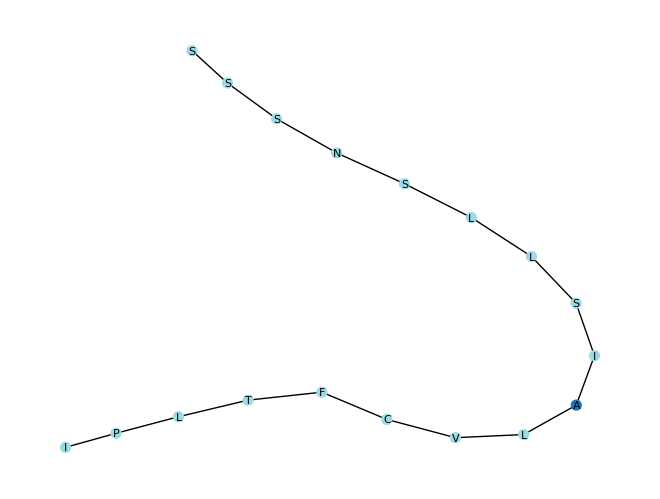

Graph 23: 20 nodes, 40 edges


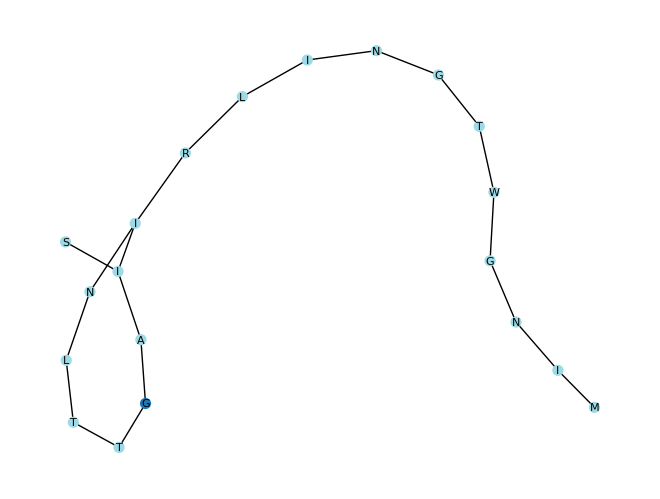

Graph 24: 17 nodes, 32 edges


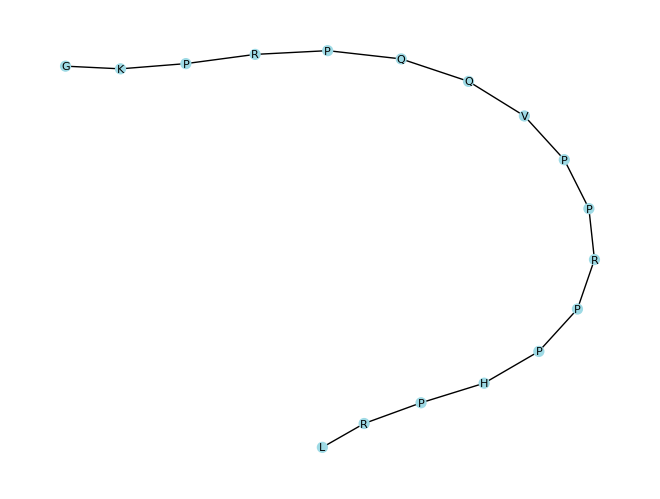

Graph 25: 18 nodes, 34 edges


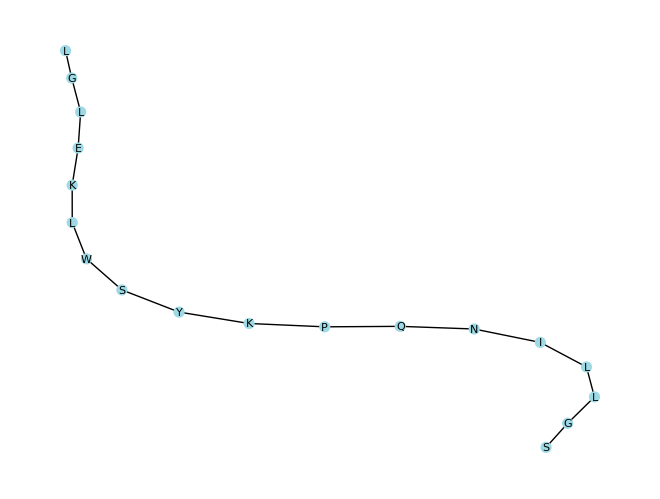

Graph 26: 21 nodes, 42 edges


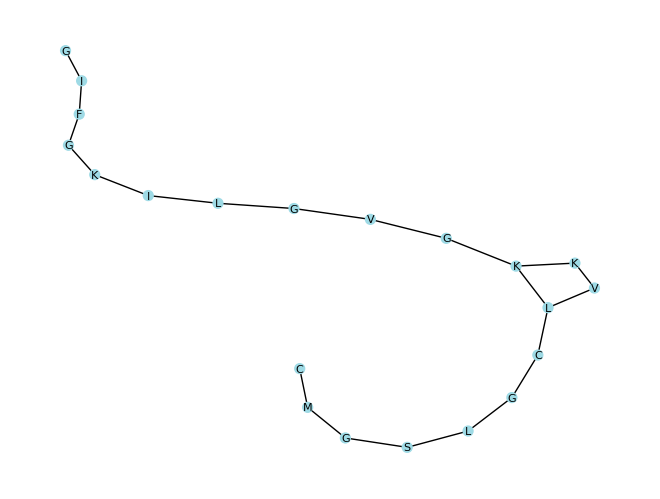

Graph 27: 16 nodes, 36 edges


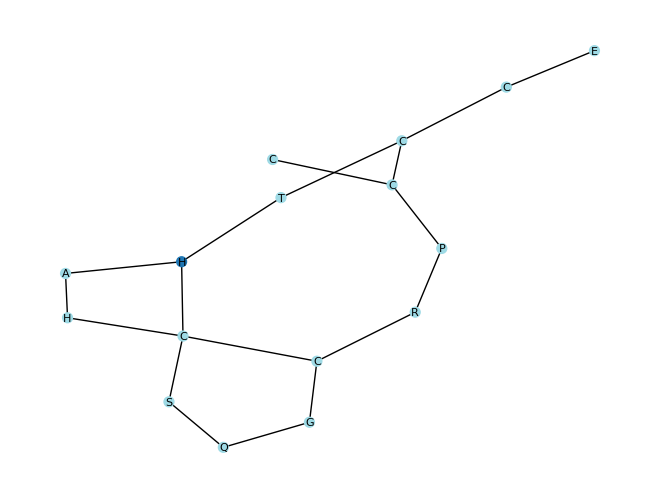

Graph 28: 21 nodes, 40 edges


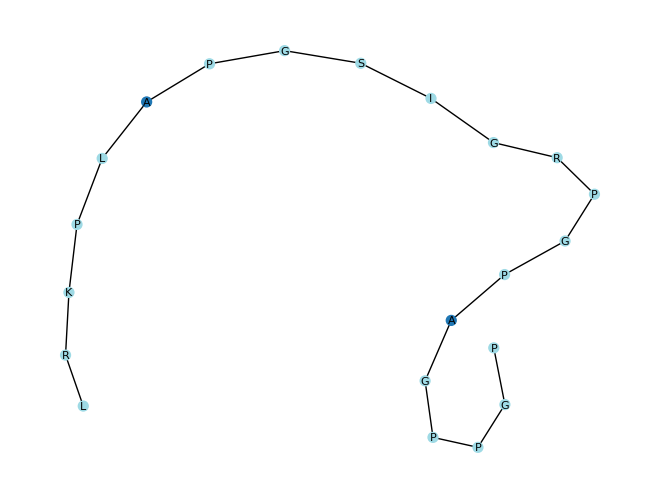

Graph 29: 20 nodes, 38 edges


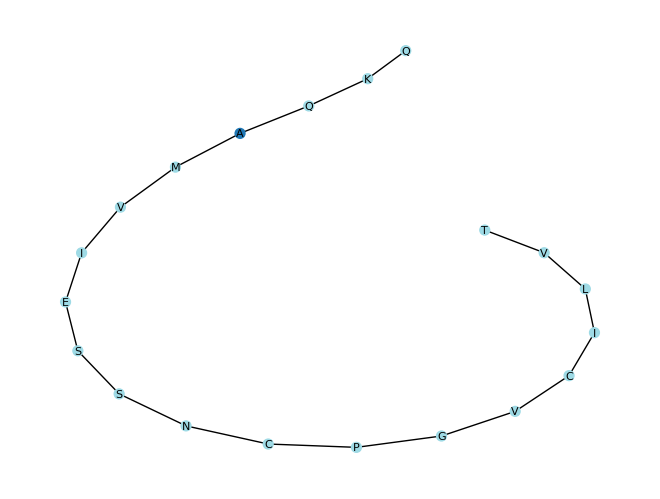

Graph 30: 16 nodes, 30 edges


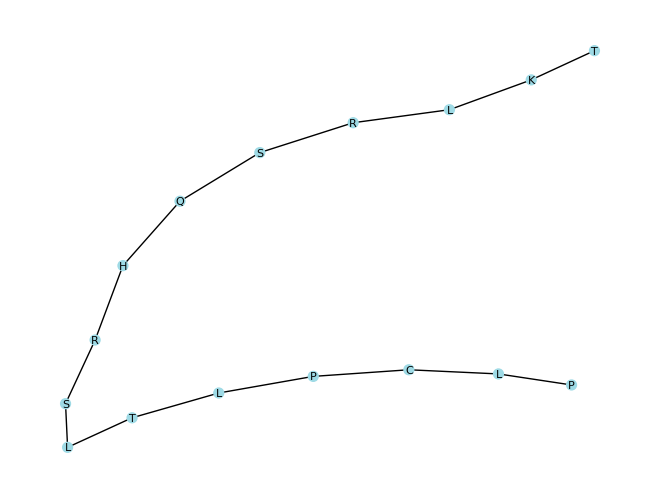

Graph 31: 18 nodes, 40 edges


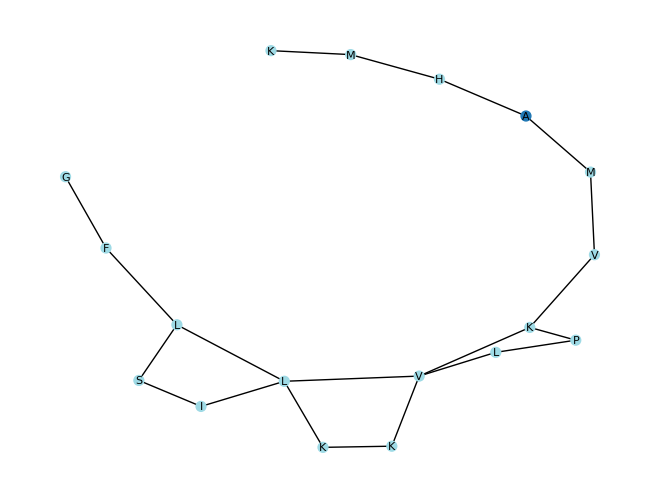

Graph 32: 20 nodes, 38 edges


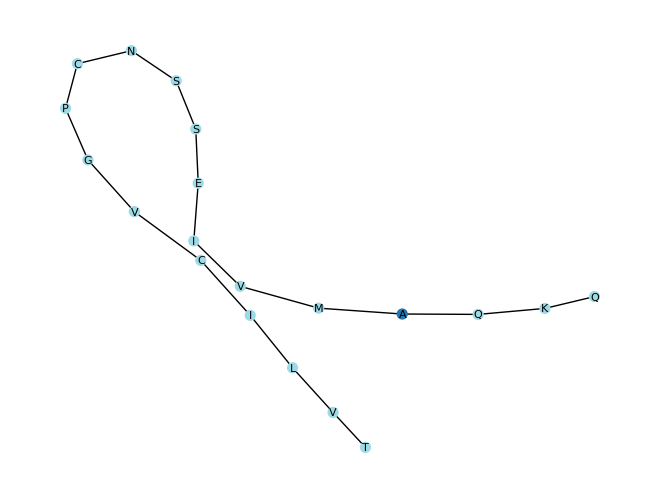

Graph 33: 17 nodes, 32 edges


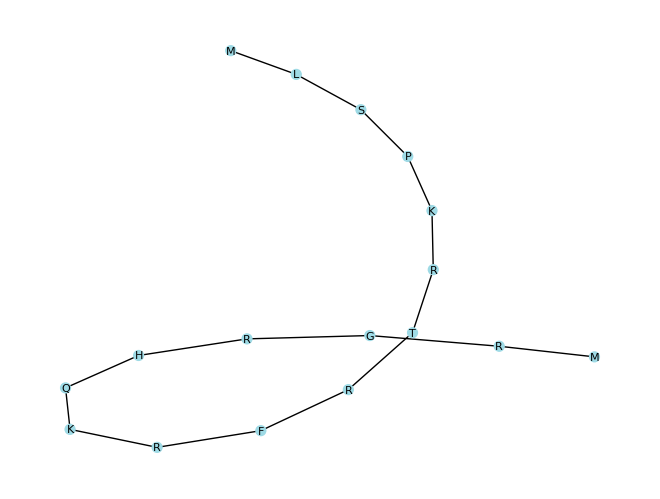

Graph 34: 18 nodes, 34 edges


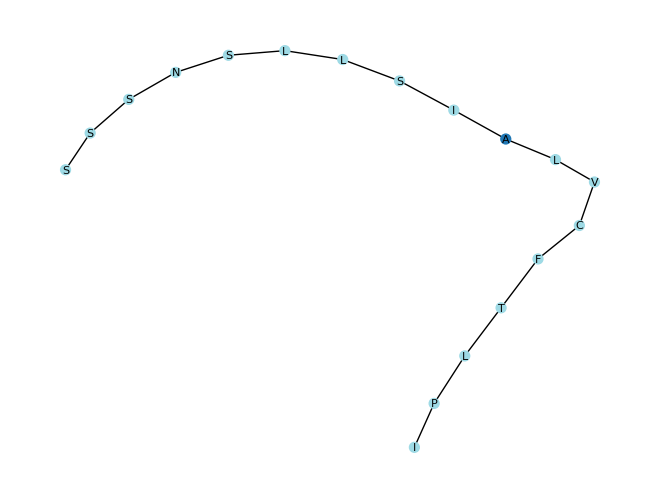

Graph 35: 18 nodes, 34 edges


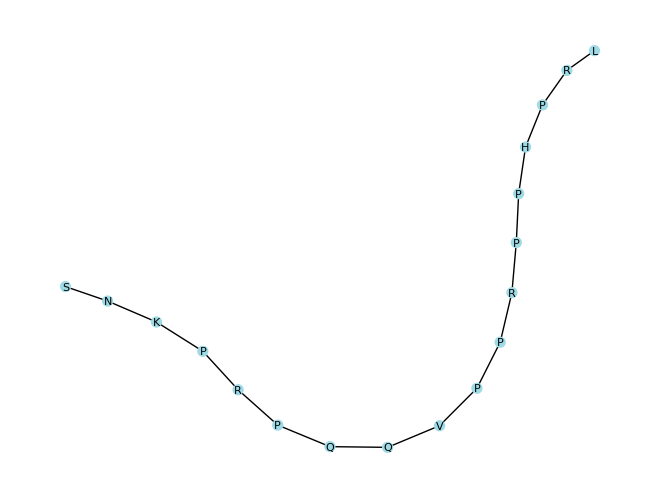

Graph 36: 18 nodes, 34 edges


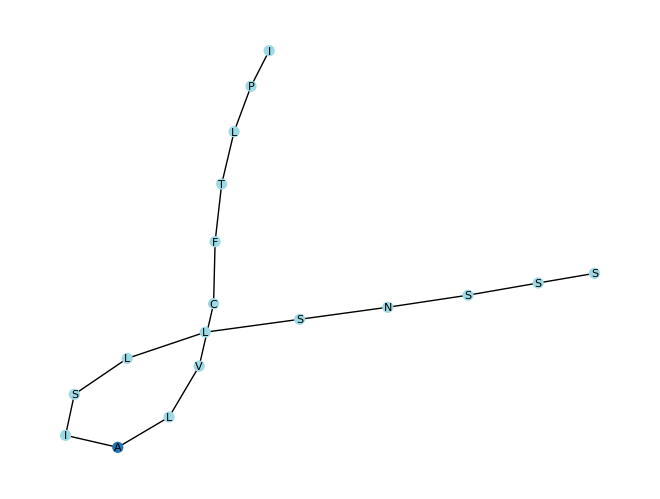

Graph 37: 19 nodes, 44 edges


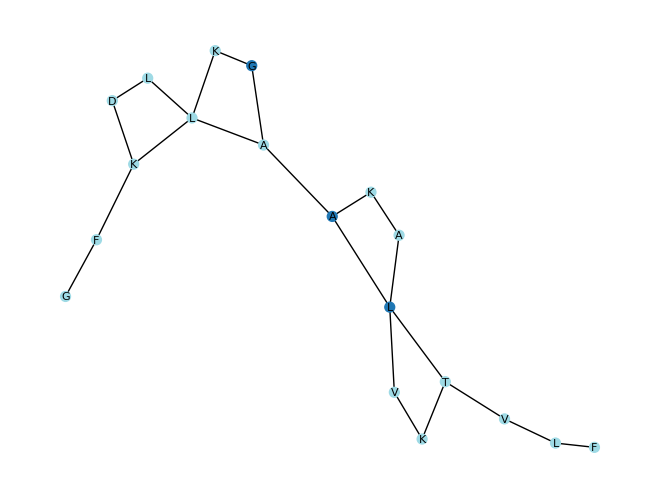

Graph 38: 21 nodes, 42 edges


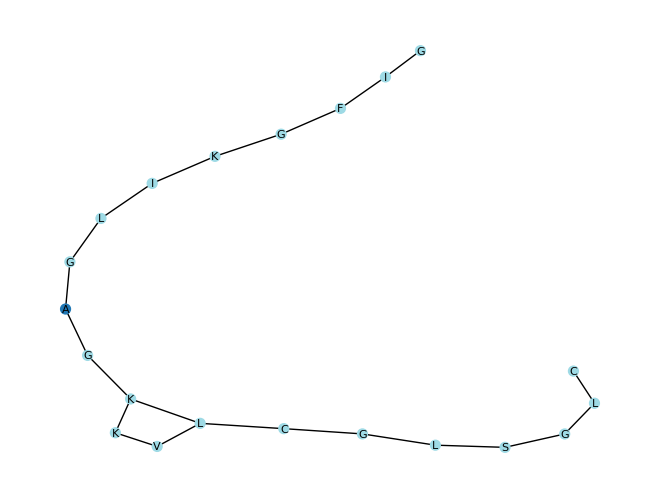

Graph 39: 20 nodes, 38 edges


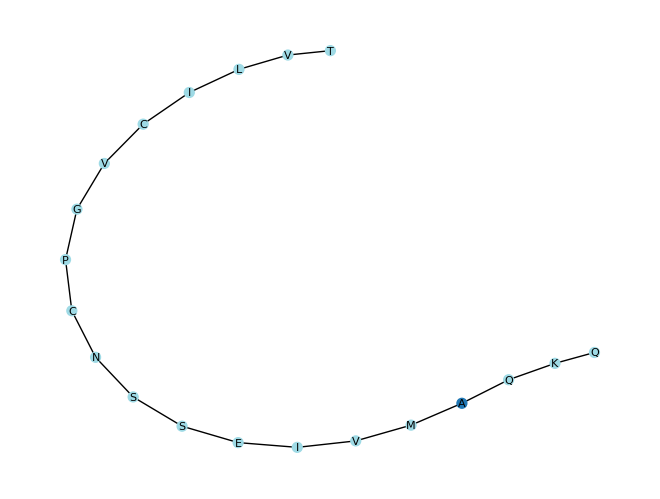

Graph 40: 20 nodes, 38 edges


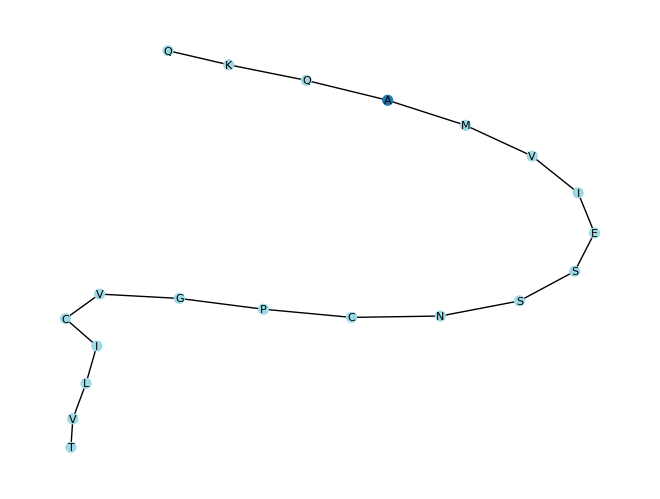

Graph 41: 16 nodes, 30 edges


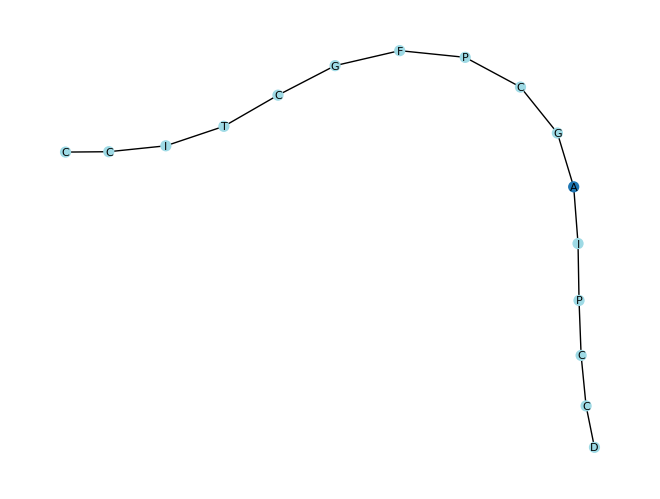

Graph 42: 18 nodes, 34 edges


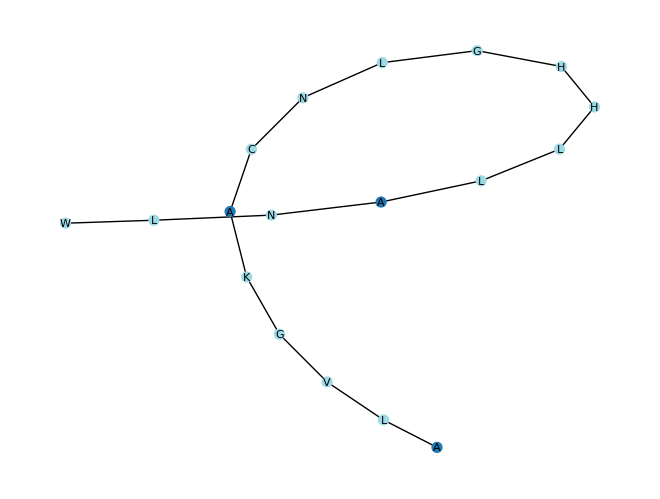

Graph 43: 17 nodes, 32 edges


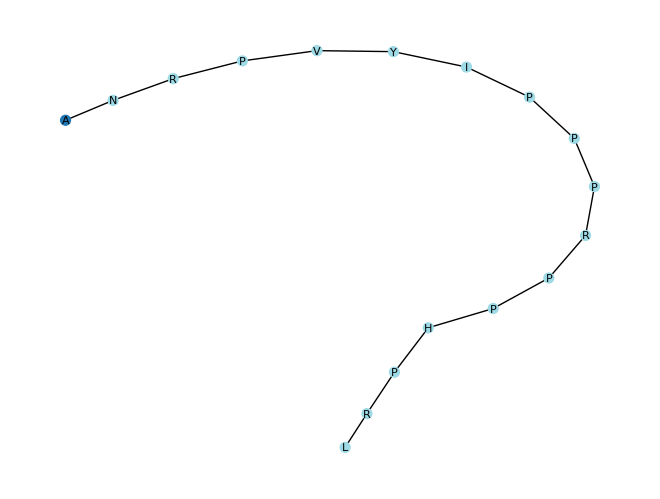

Graph 44: 17 nodes, 32 edges


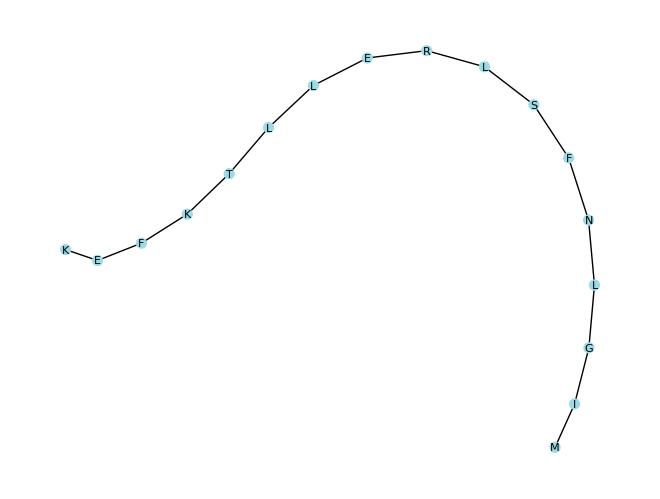

Graph 45: 16 nodes, 30 edges


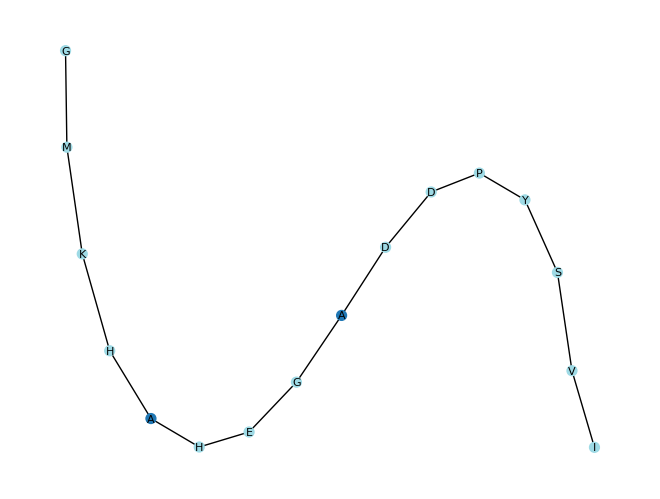

Graph 46: 19 nodes, 36 edges


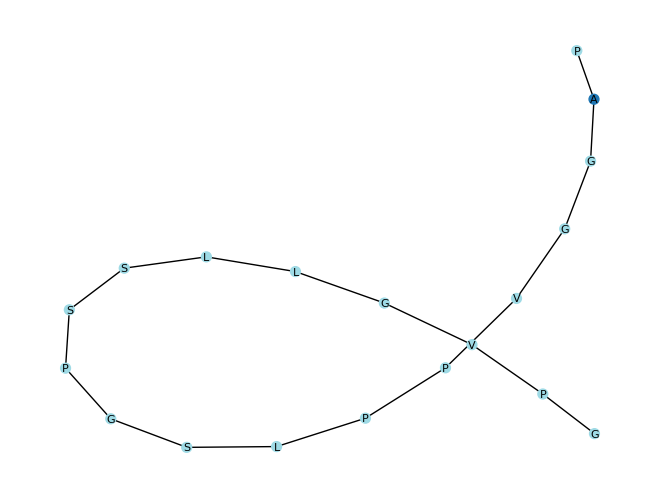

Graph 47: 20 nodes, 38 edges


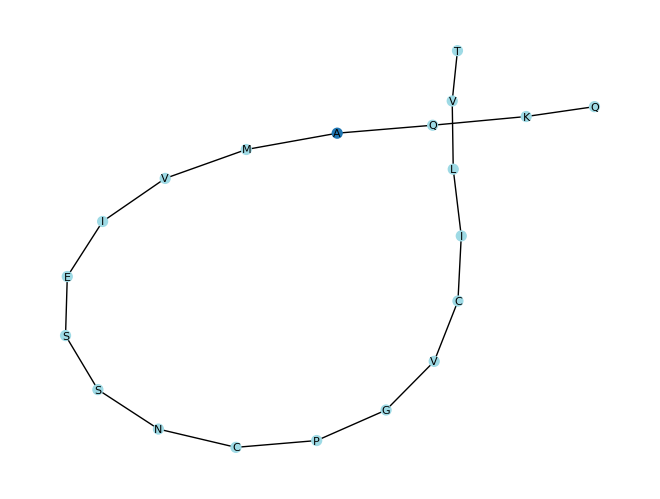

Graph 48: 16 nodes, 32 edges


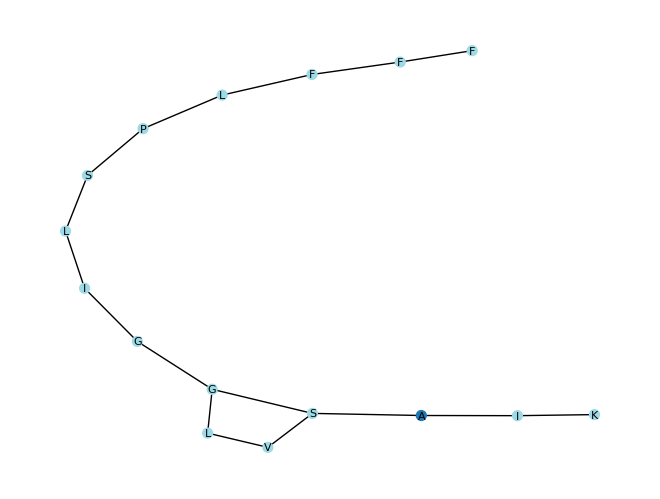

Graph 49: 20 nodes, 44 edges


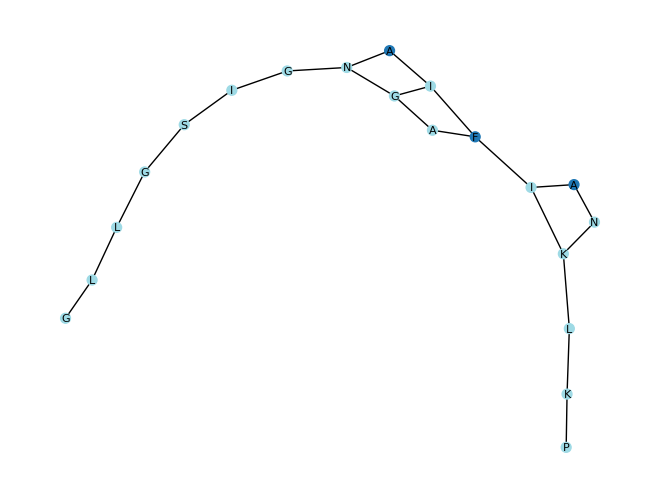

Graph 50: 16 nodes, 30 edges


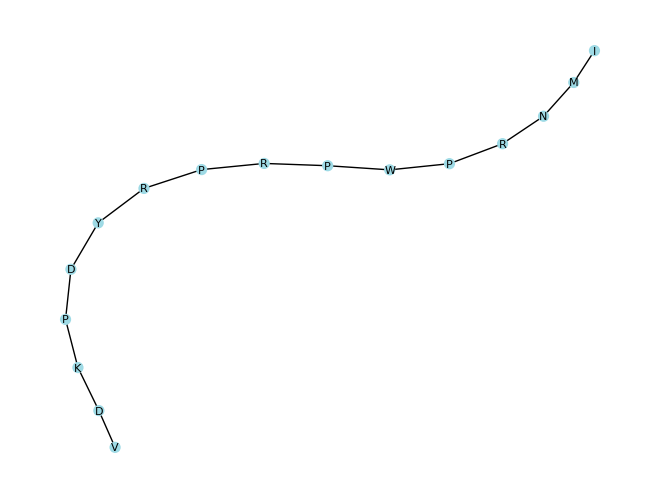

Graph 51: 20 nodes, 44 edges


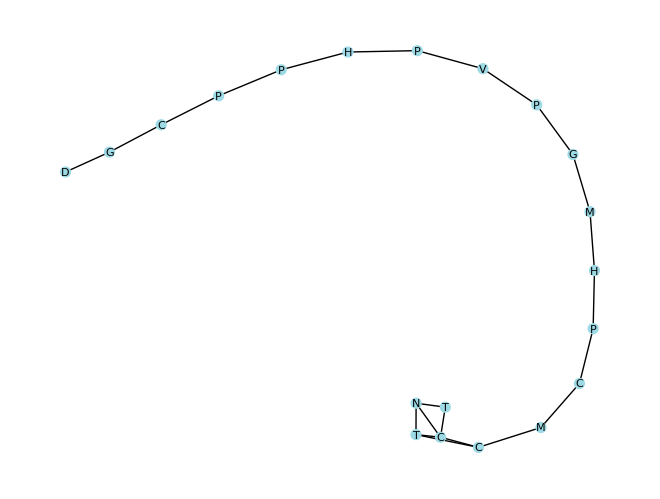

Graph 52: 18 nodes, 34 edges


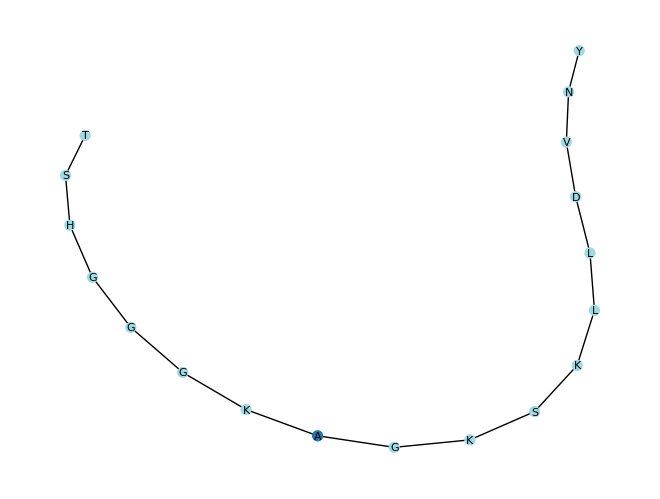

Graph 53: 21 nodes, 48 edges


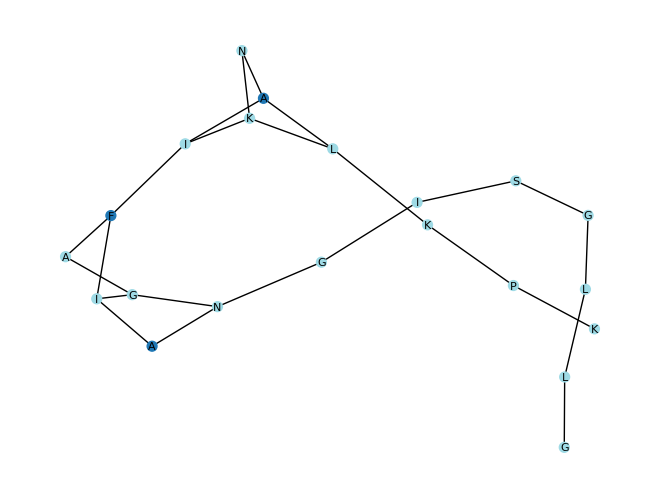

Graph 54: 17 nodes, 38 edges


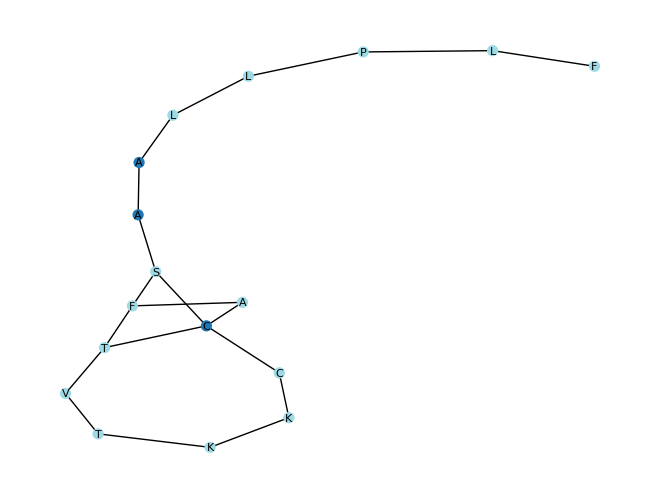

Graph 55: 20 nodes, 38 edges


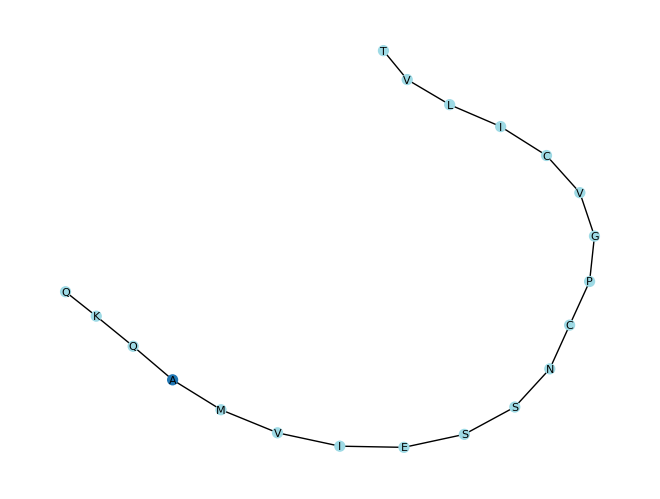

Graph 56: 19 nodes, 38 edges


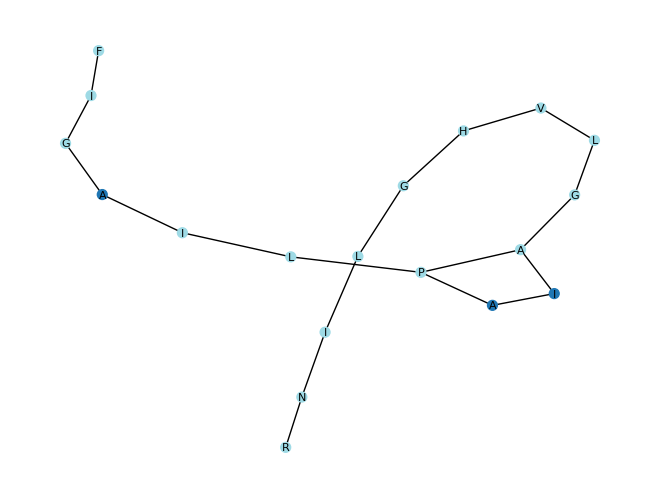

Graph 57: 20 nodes, 38 edges


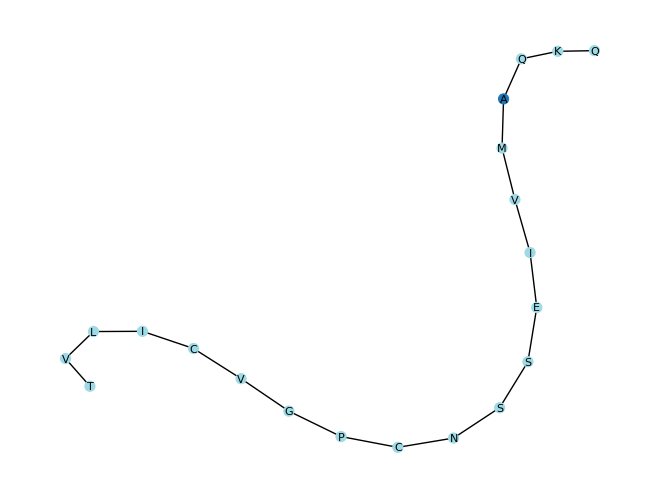

Graph 58: 17 nodes, 32 edges


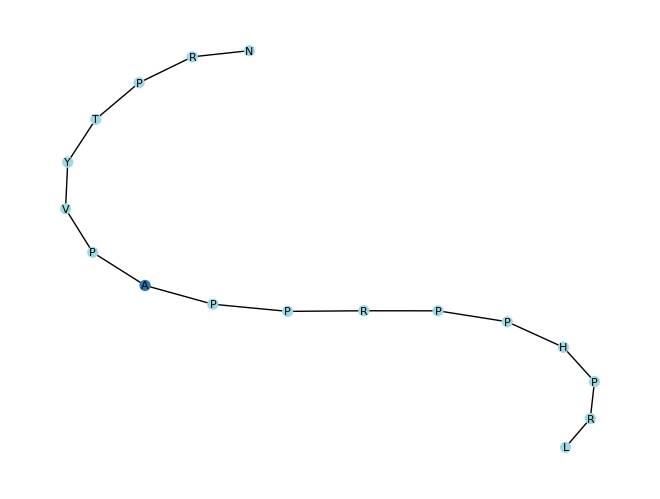

Graph 59: 16 nodes, 30 edges


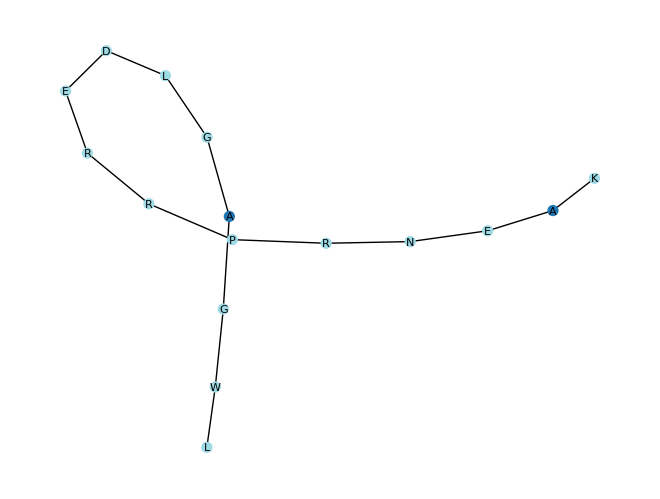

Graph 60: 18 nodes, 40 edges


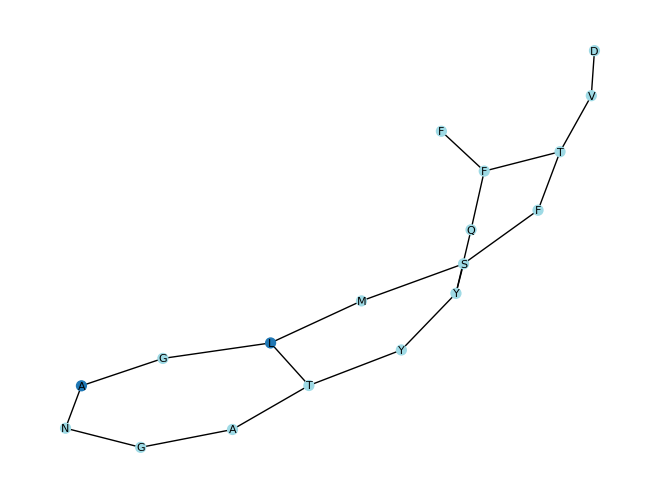

Graph 61: 18 nodes, 34 edges


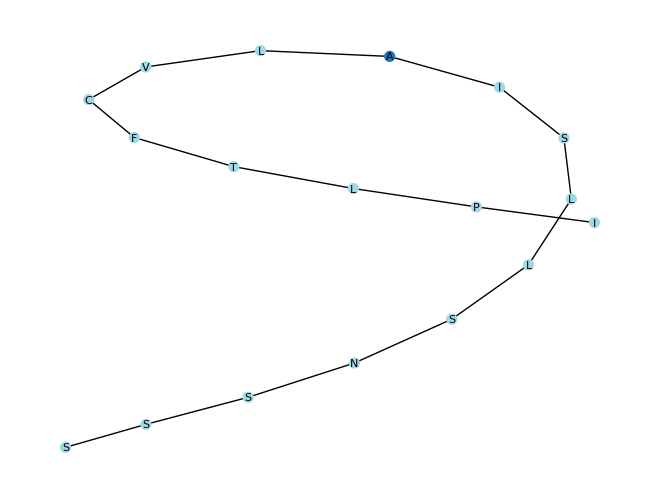

Graph 62: 17 nodes, 32 edges


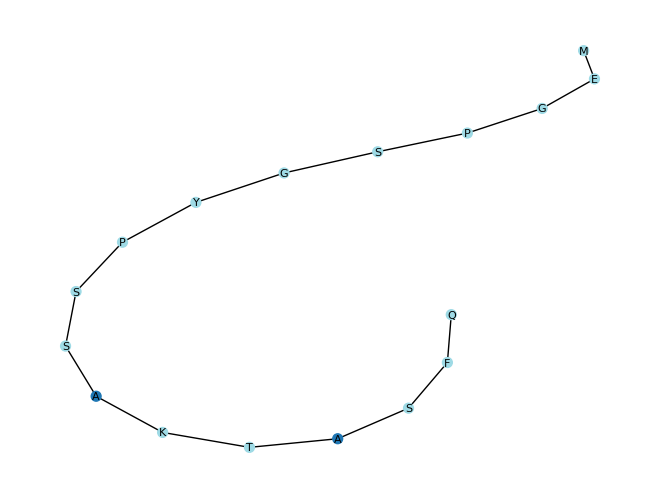

Graph 63: 21 nodes, 40 edges


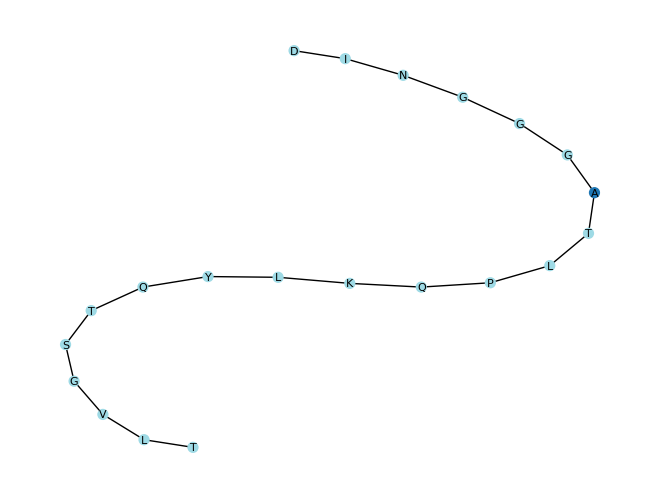

Graph 64: 16 nodes, 32 edges


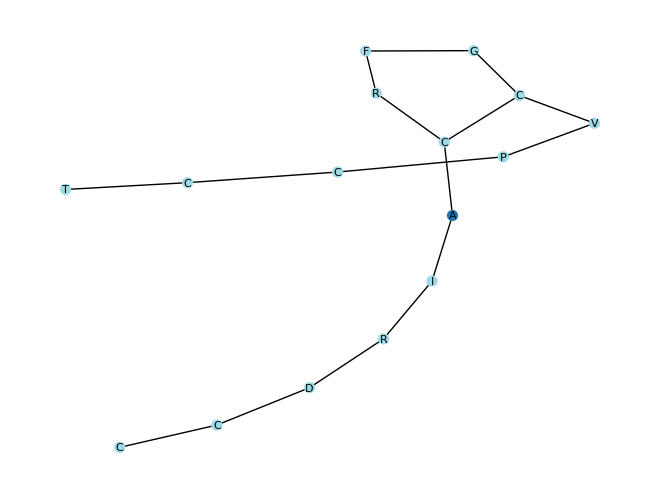

Graph 65: 17 nodes, 34 edges


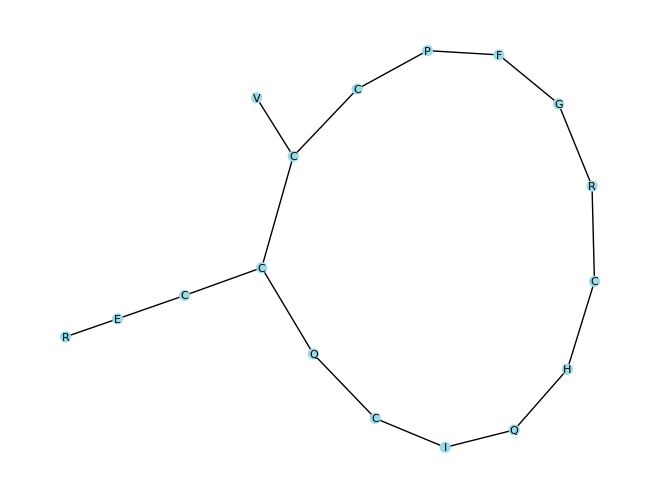

Graph 66: 17 nodes, 32 edges


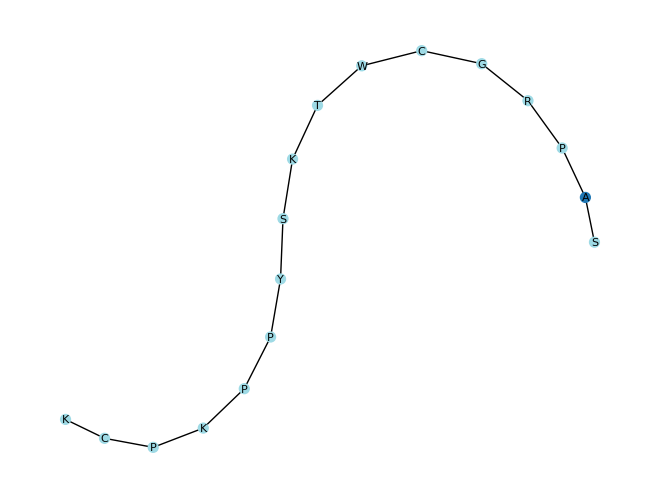

Graph 67: 20 nodes, 38 edges


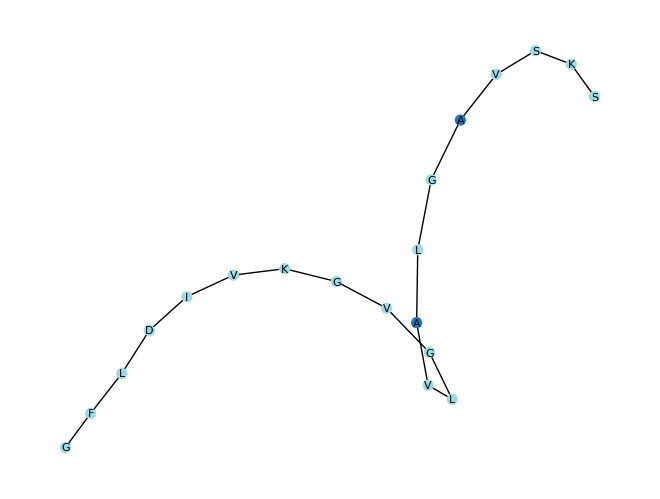

Graph 68: 18 nodes, 34 edges


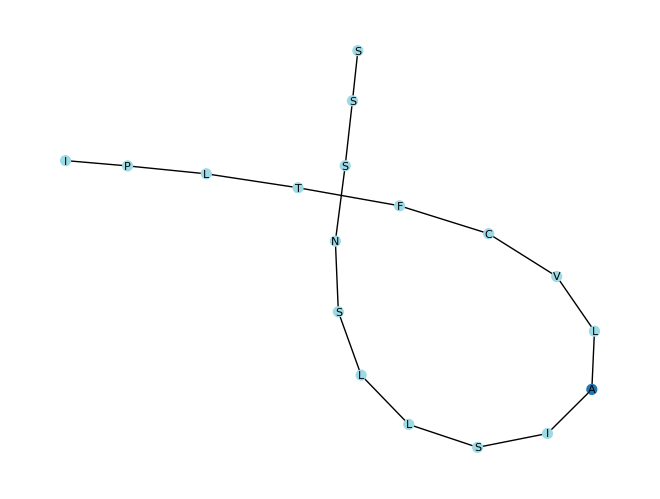

Graph 69: 19 nodes, 36 edges


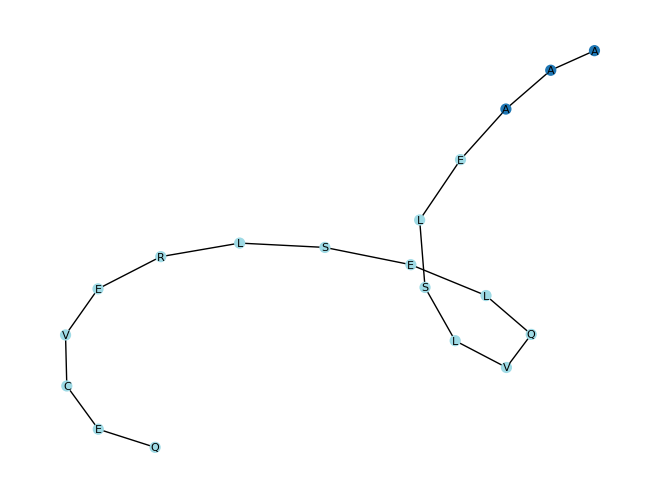

Graph 70: 18 nodes, 34 edges


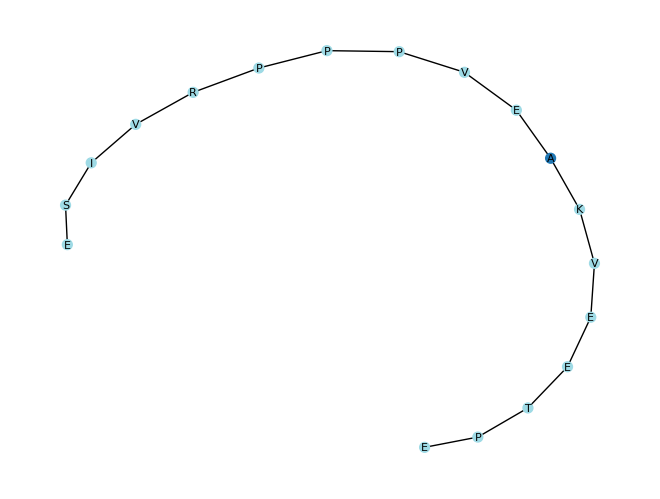

Graph 71: 17 nodes, 34 edges


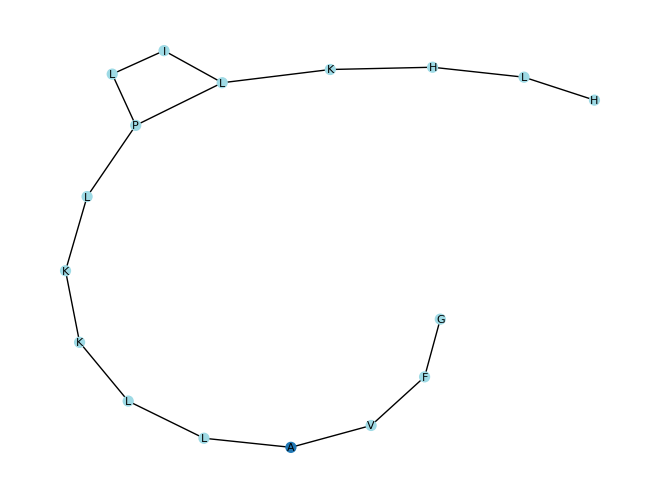

Graph 72: 18 nodes, 34 edges


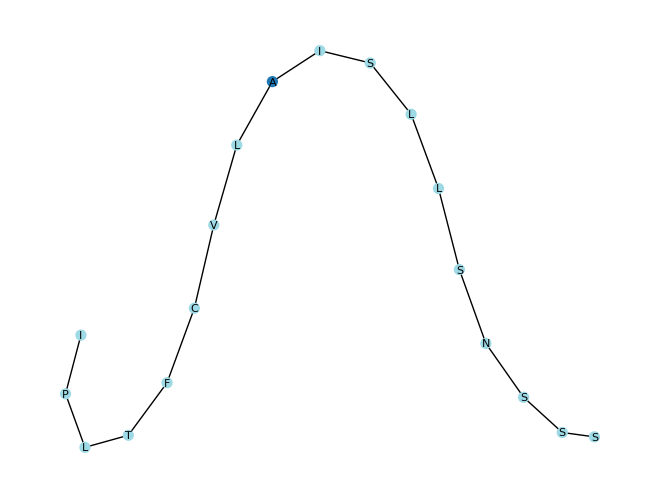

Graph 73: 17 nodes, 32 edges


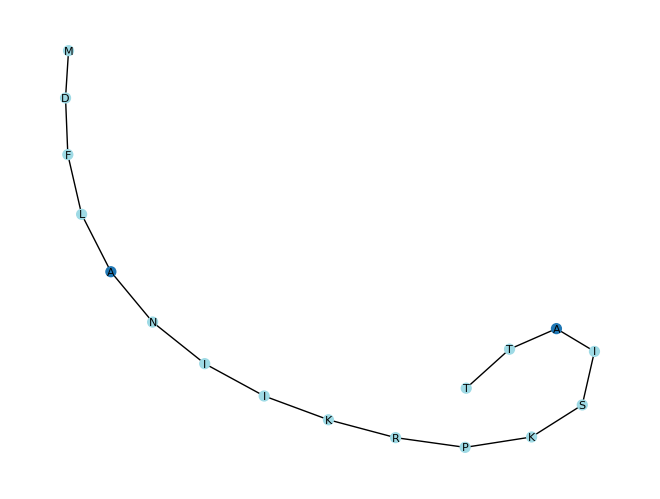

Graph 74: 20 nodes, 40 edges


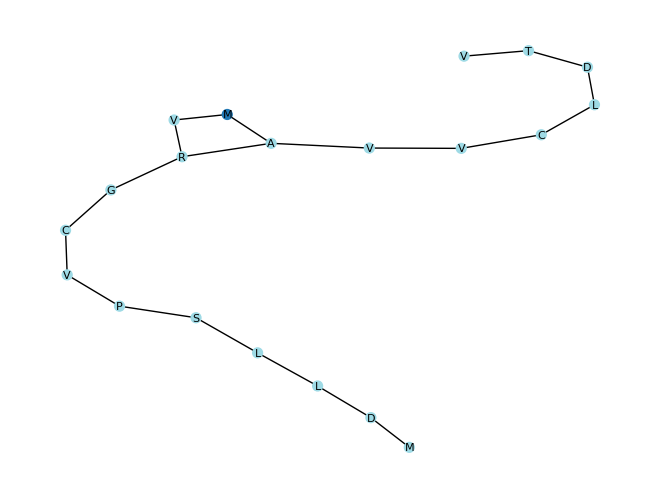

Graph 75: 20 nodes, 40 edges


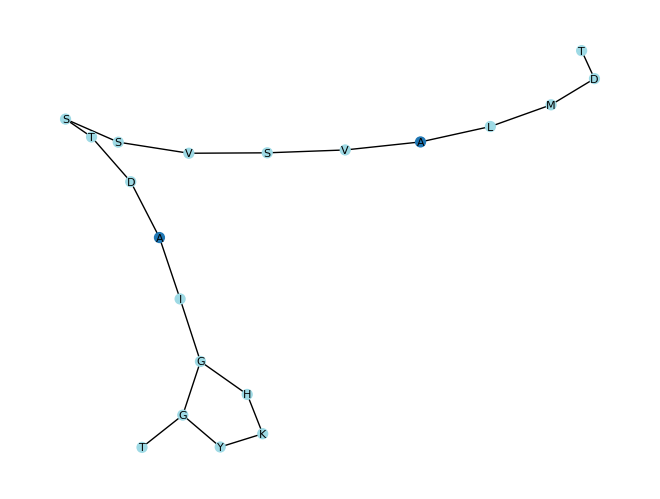

Graph 76: 16 nodes, 34 edges


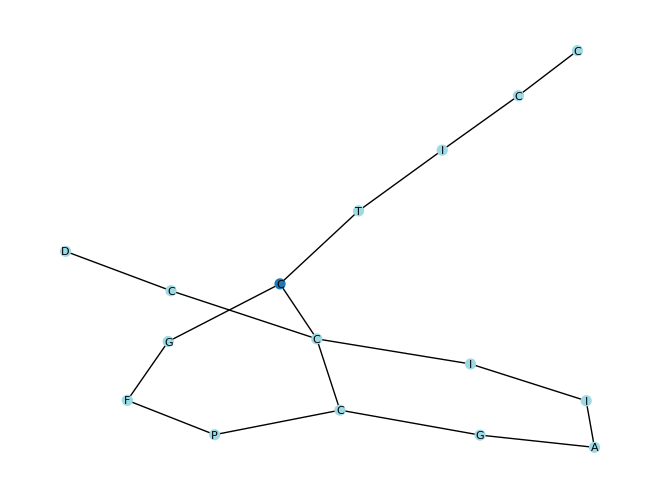

Graph 77: 16 nodes, 30 edges


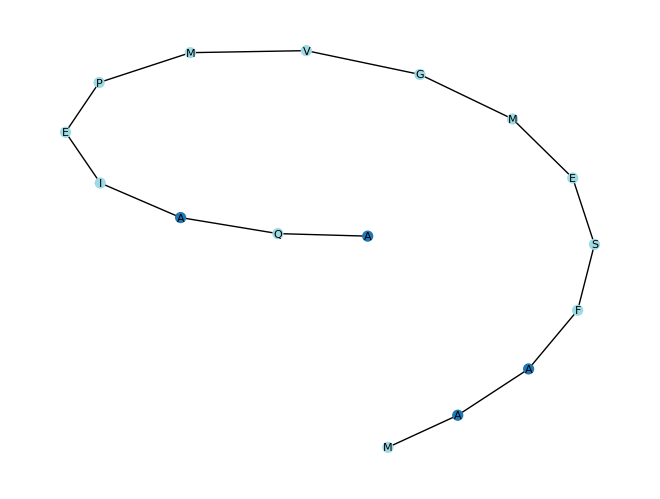

Graph 78: 17 nodes, 32 edges


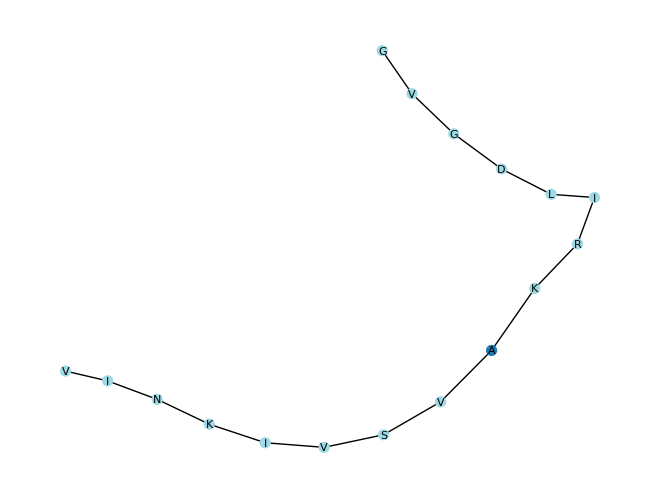

Graph 79: 16 nodes, 34 edges


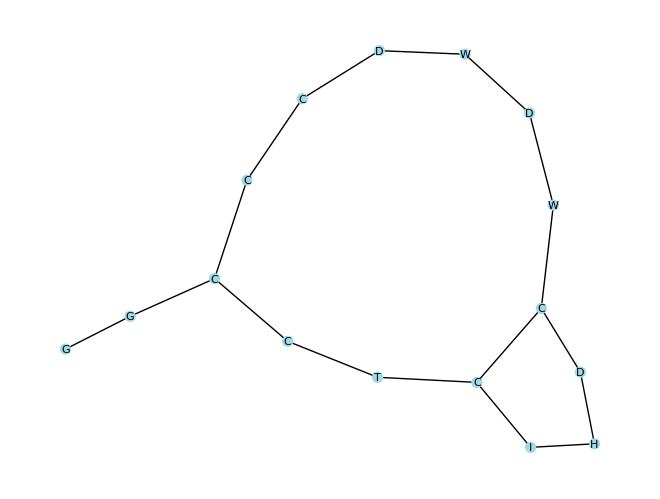

Graph 80: 17 nodes, 36 edges


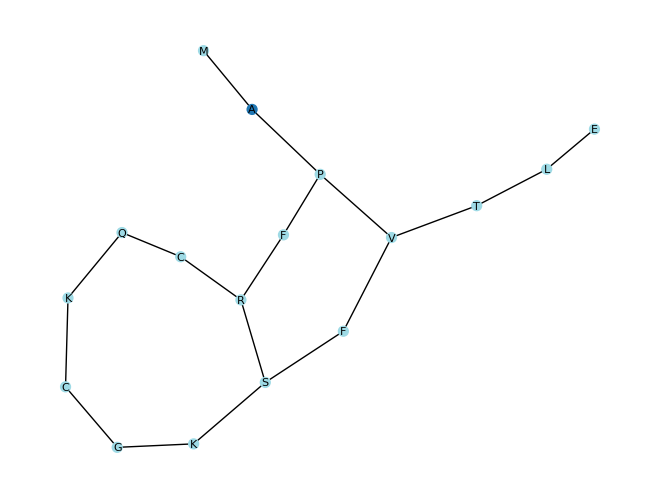

Graph 81: 18 nodes, 34 edges


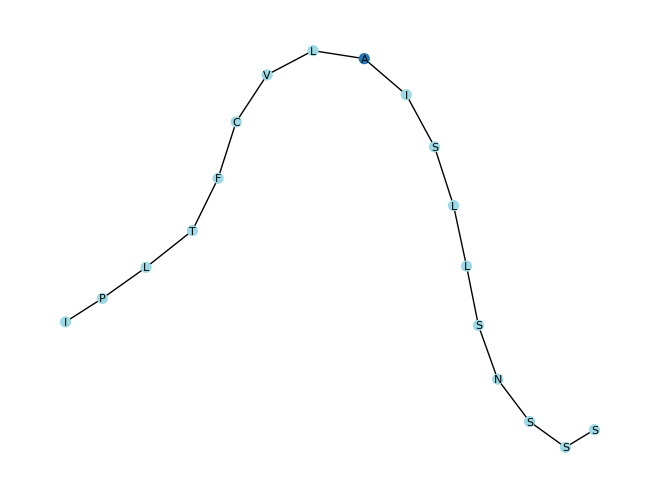

Graph 82: 20 nodes, 38 edges


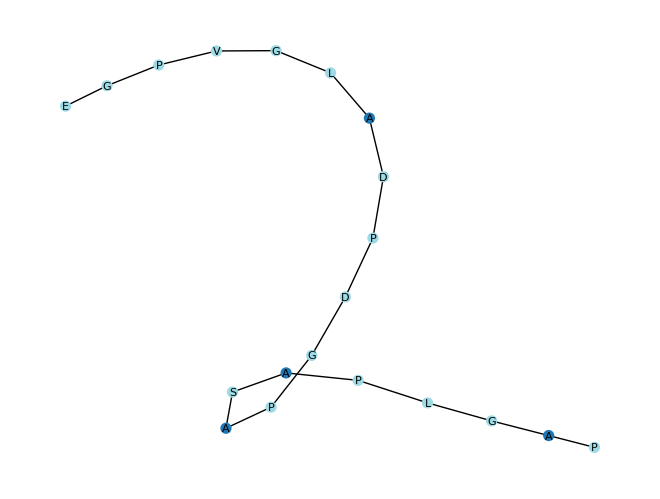

Graph 83: 17 nodes, 32 edges


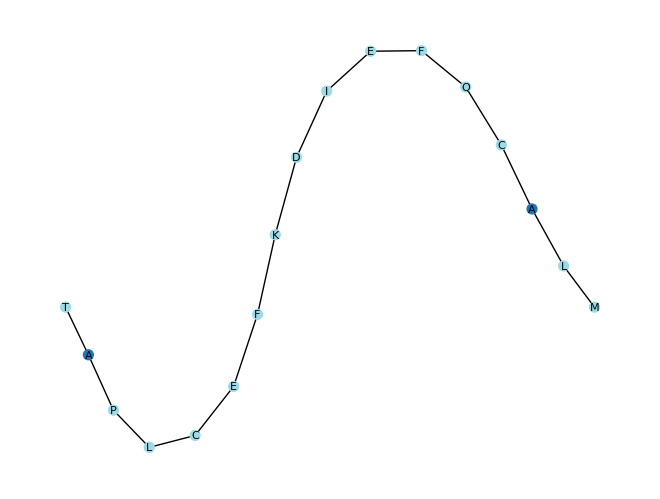

Graph 84: 20 nodes, 42 edges


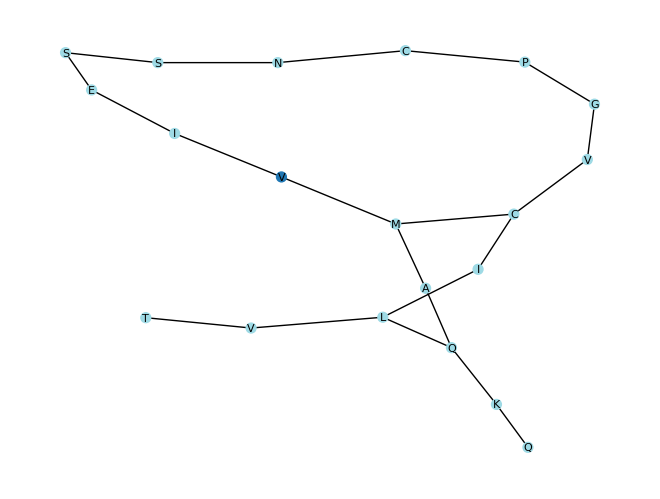

Graph 85: 20 nodes, 38 edges


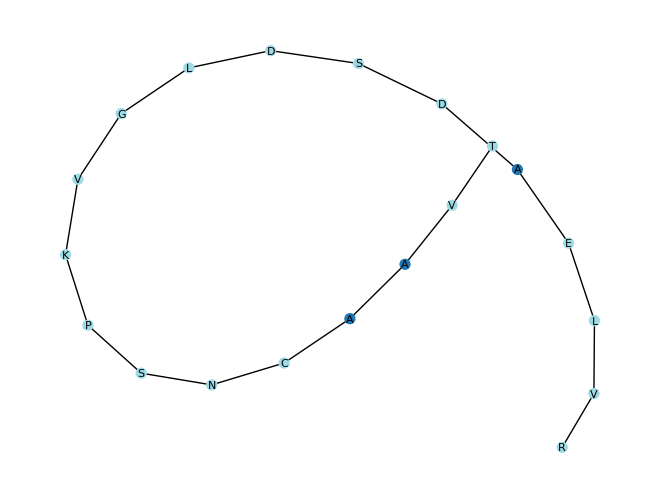

Graph 86: 16 nodes, 30 edges


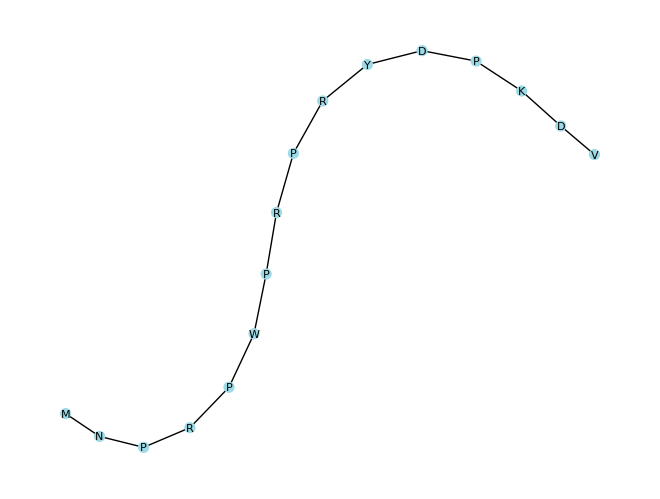

Graph 87: 16 nodes, 30 edges


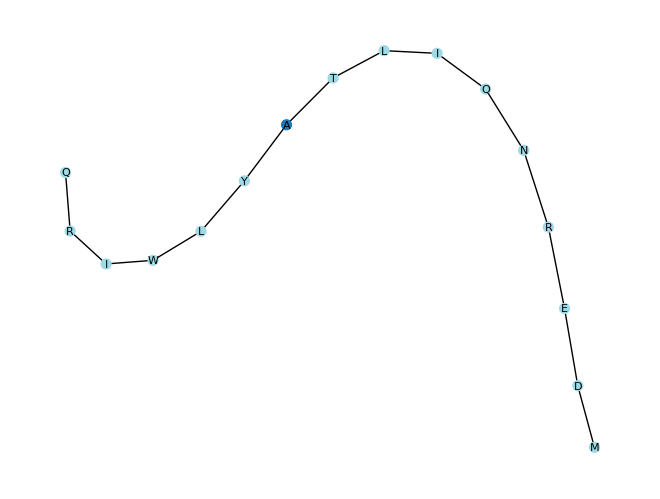

Graph 88: 16 nodes, 34 edges


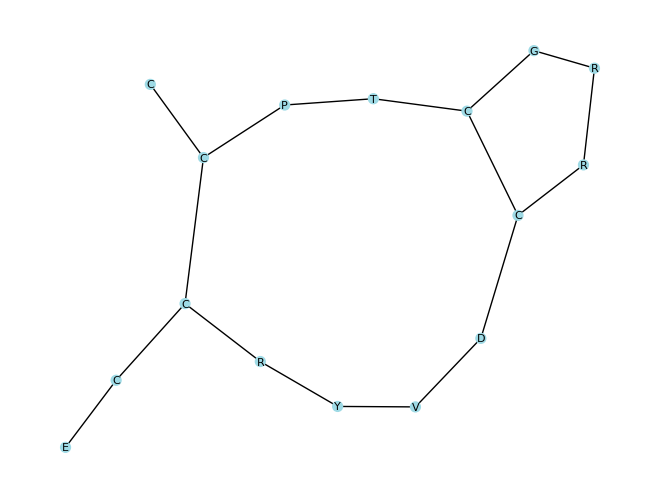

Graph 89: 20 nodes, 38 edges


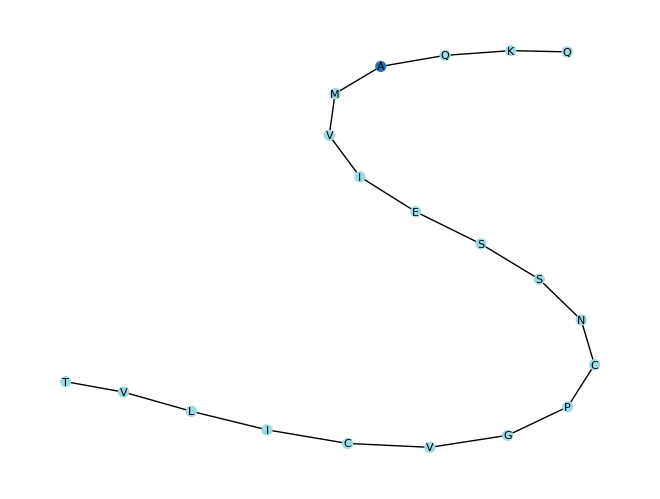

Graph 90: 17 nodes, 32 edges


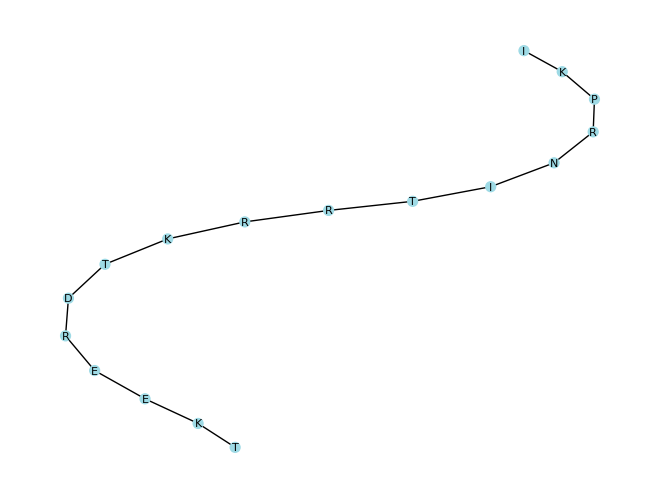

Graph 91: 16 nodes, 30 edges


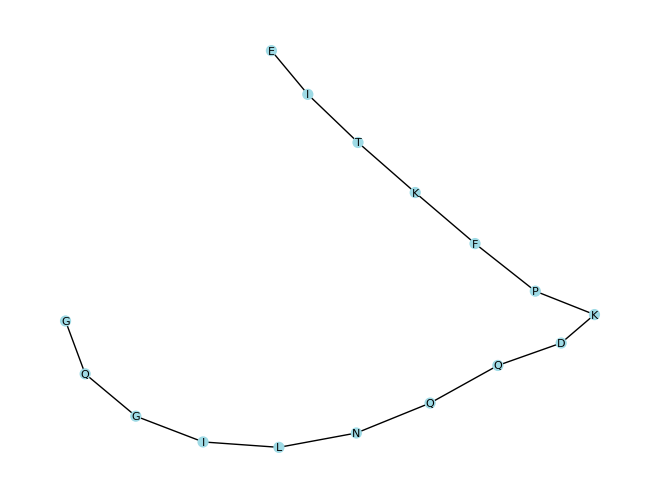

Graph 92: 17 nodes, 38 edges


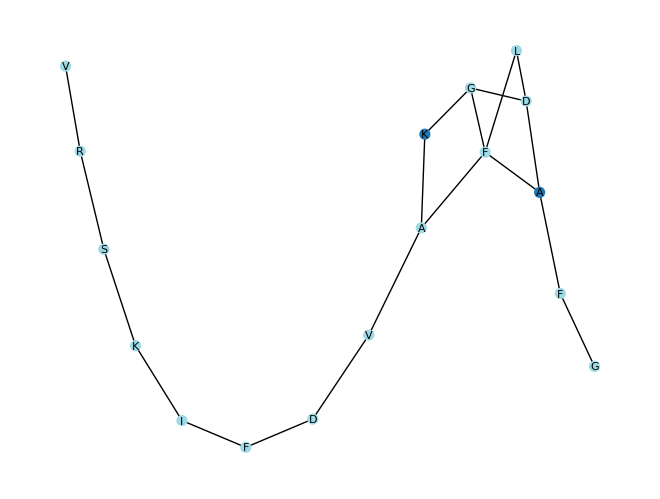

Graph 93: 20 nodes, 40 edges


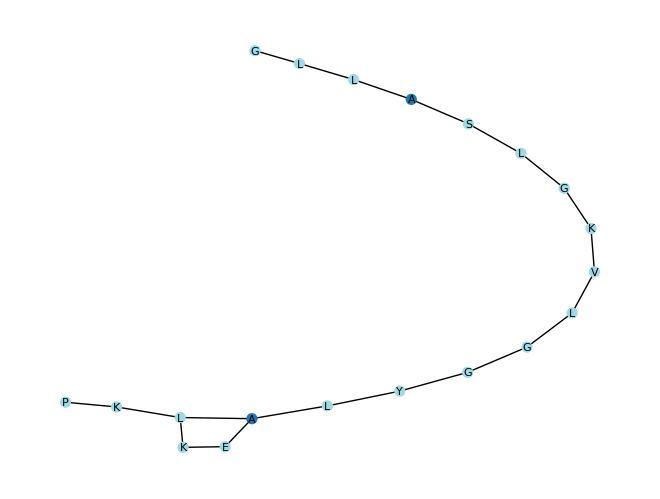

Graph 94: 20 nodes, 38 edges


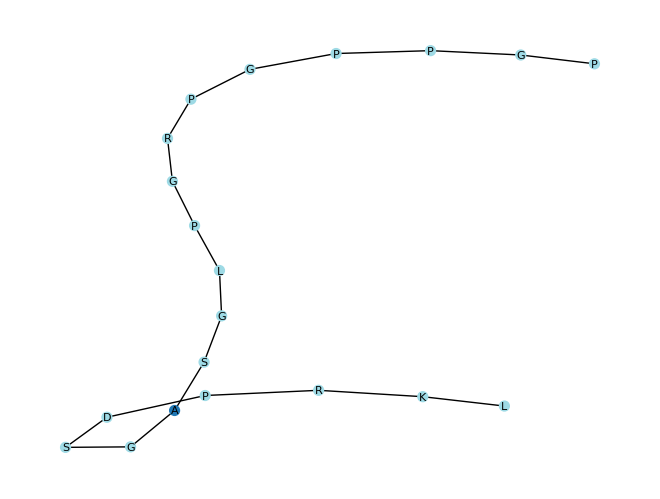

Graph 95: 21 nodes, 42 edges


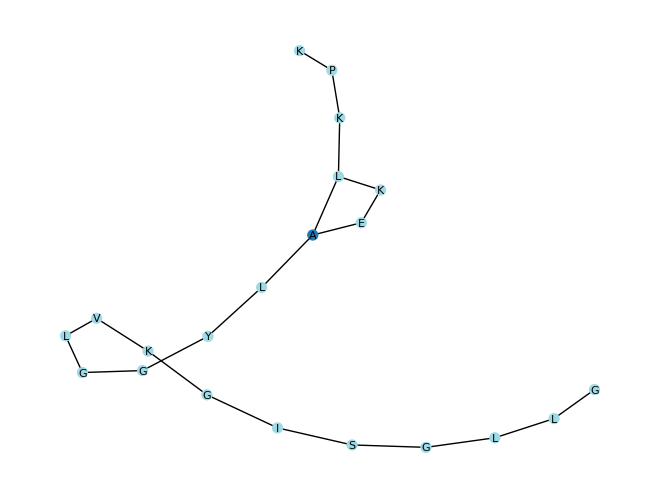

Graph 96: 17 nodes, 32 edges


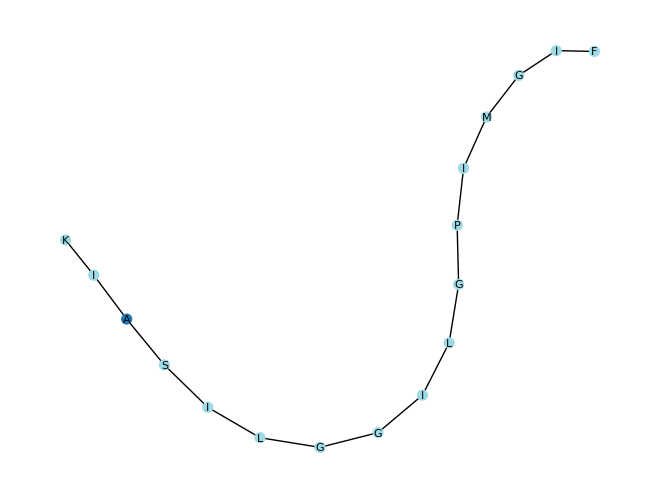

Graph 97: 18 nodes, 34 edges


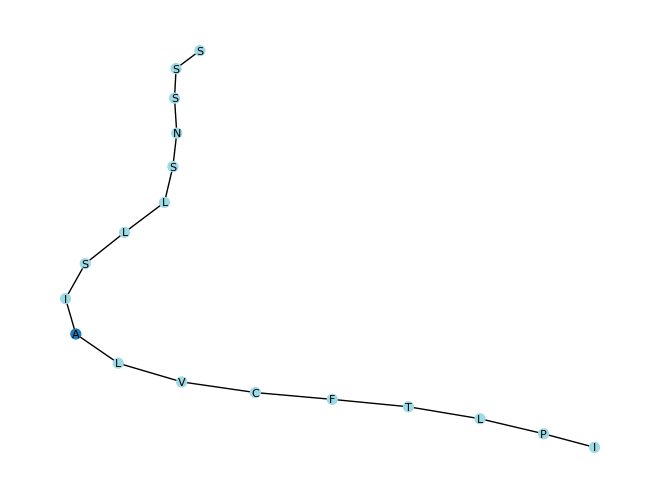

Graph 98: 19 nodes, 38 edges


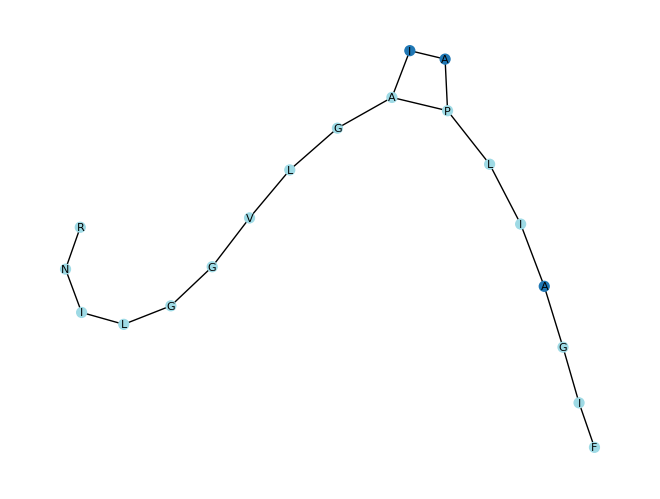

Graph 99: 17 nodes, 32 edges


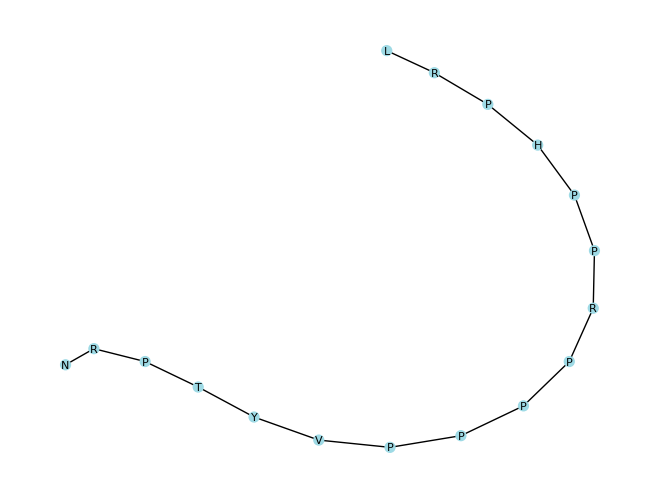

Graph 100: 20 nodes, 38 edges


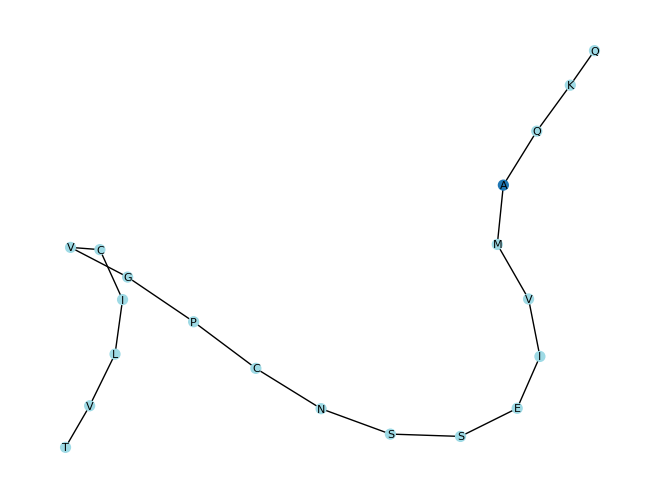

In [5]:
graphs = []
for df in encoded_autoencoder_input_dfs:
    graph = graph_creator.create_graph(df)
    graphs.append(graph)

# Now `graphs` contains all the graphs created from the encoded DataFrames
for i, graph in enumerate(graphs):
    print(f"Graph {i + 1}: {graph.num_nodes} nodes, {graph.num_edges} edges")
    graph_creator.draw_graph(graph, le)

In [5]:


def create_graphs_from_pdbs(pdb_files, aa_info_file):
    graphs = []
    for pdb_file in pdb_files:
        print(f"Parsing file: {pdb_file}")
        analyzer = ProteinAnalyzer(pdb_file, aa_info_file)
        graph_creator = GraphCreator(pdb_file, aa_info_file)

        # Generate the autoencoder input DataFrame
        autoencoder_input_df = analyzer.prepare_autoencoder_input()
        
        graph, _ = graph_creator.create_graph(autoencoder_input_df)

        # Append the graph to the list
        graphs.append(graph)

    return graphs

# Directory containing PDB files
#pdb_directory = '/Users/alexchilton/Downloads/archive/just100'
#aa_info_file = 'aa_mass_letter.csv'

# Load PDB files
#pdb_files = load_pdb_files(pdb_directory)

# Create graphs from PDB files
#graphs = create_graphs_from_pdbs(pdb_files, aa_info_file)

# Now `graphs` contains all the graphs created from the PDB files

In [6]:
le = LabelEncoder()
all_labels = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']

le.fit(all_labels)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



In [7]:
# Print the unique class labels learned by the LabelEncoder
print("Class labels in LabelEncoder:", le.classes_)

Class labels in LabelEncoder: ['A' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'K' 'L' 'M' 'N' 'P' 'Q' 'R' 'S' 'T' 'V'
 'W' 'Y']


In [8]:
#for i, graph in enumerate(graphs):
 #   print(f"Graph {i + 1}: {graph.num_nodes} nodes, {graph.num_edges} edges")
   # graph_creator.draw_graph(graph, le)


In [7]:
import torch
from torch_geometric.data import Data

def pad_graphs( graphs, max_nodes):
    padded_graphs = []
    for graph in graphs:
        num_nodes = graph.x.size(0)
        if num_nodes < max_nodes:
            # Pad node features
            padding = torch.zeros((max_nodes - num_nodes, graph.x.size(1)))
            padded_x = torch.cat([graph.x, padding], dim=0)

            # Pad edge indices
            padded_edge_index = graph.edge_index

            # Create padded graph
            padded_graph = Data(x=padded_x, edge_index=padded_edge_index)
            padded_graphs.append(padded_graph)
        else:
            padded_graphs.append(graph)
    return padded_graphs

# Determine the maximum number of nodes in the dataset
max_num_nodes = max(graph.num_nodes for graph in graphs)
# Pad all graphs to have the same number of nodes
padded_graphs = pad_graphs(graphs, max_num_nodes)

# Now `padded_graphs` contains all the graphs with the same number of nodes and padded `AA_encoded` column

In [9]:
def replace_zeros_in_column(tensor, column_index, replacement_value):
    tensor[:, column_index] = torch.where(tensor[:, column_index] == 0, replacement_value, tensor[:, column_index])
    return tensor

replace_zeros_in_column(padded_graphs[0].x, 3, 3)

tensor([[-3.3610e+00,  1.0300e-01,  5.0390e+00,  3.0000e+00,  1.3117e+02,
          3.8621e+00,  3.8621e+00,  1.0000e+00],
        [-5.6600e-01, -2.5570e+00,  5.2060e+00,  3.0000e+00,  1.3117e+02,
          3.8607e+00,  3.8621e+00,  2.0000e+00],
        [-1.3980e+00, -3.9890e+00,  1.7200e+00,  1.0000e+00,  1.4713e+02,
          3.8563e+00,  3.8594e+00,  2.0000e+00],
        [-1.4160e+00, -4.2900e-01,  2.4600e-01,  4.0000e+00,  1.4619e+02,
          3.8521e+00,  3.8531e+00,  2.0000e+00],
        [ 1.9850e+00,  2.7900e-01,  1.9080e+00,  5.0000e+00,  1.3117e+02,
          3.8531e+00,  3.8551e+00,  2.0000e+00],
        [ 3.4840e+00, -3.0710e+00,  7.2800e-01,  9.0000e+00,  1.1715e+02,
          3.8512e+00,  3.8551e+00,  2.0000e+00],
        [ 2.1240e+00, -2.5710e+00, -2.8360e+00,  6.0000e+00,  1.3212e+02,
          3.8563e+00,  3.8654e+00,  2.0000e+00],
        [ 3.4630e+00,  1.0550e+00, -2.8530e+00,  8.0000e+00,  1.1912e+02,
          4.2093e+00,  4.9184e+00,  3.0000e+00],
        [ 6.9100

In [8]:
# Print each node's features for the first padded graph
first_padded_graph = padded_graphs[0]
for i, node_features in enumerate(first_padded_graph.x):
    print(f"Node {i + 1}: {node_features}")

Node 1: tensor([-3.3610e+00,  1.0300e-01,  5.0390e+00,  7.0000e+00,  1.3117e+02,
         3.8621e+00,  3.8621e+00,  1.0000e+00])
Node 2: tensor([ -0.5660,  -2.5570,   5.2060,   7.0000, 131.1746,   3.8607,   3.8621,
          2.0000])
Node 3: tensor([ -1.3980,  -3.9890,   1.7200,   3.0000, 147.1307,   3.8563,   3.8594,
          2.0000])
Node 4: tensor([ -1.4160,  -0.4290,   0.2460,   8.0000, 146.1893,   3.8521,   3.8531,
          2.0000])
Node 5: tensor([  1.9850,   0.2790,   1.9080,   9.0000, 131.1746,   3.8531,   3.8551,
          2.0000])
Node 6: tensor([  3.4840,  -3.0710,   0.7280,  17.0000, 117.1478,   3.8512,   3.8551,
          2.0000])
Node 7: tensor([  2.1240,  -2.5710,  -2.8360,  11.0000, 132.1190,   3.8563,   3.8654,
          2.0000])
Node 8: tensor([  3.4630,   1.0550,  -2.8530,  16.0000, 119.1203,   4.2093,   4.9184,
          3.0000])
Node 9: tensor([ 6.9100, -0.1680, -1.6700,  0.0000, 89.0940,  3.8462,  3.8483,  2.0000])
Node 10: tensor([  6.9320,  -3.1130,  -4.1470, 

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph2( graph, le, seed=42):
    g = nx.Graph()
    edge_index = graph.edge_index.numpy()
    for i in range(edge_index.shape[1]):
        g.add_edge(edge_index[0, i], edge_index[1, i])

    pos = nx.spring_layout(g, seed=seed)  # Set a fixed seed for consistent layouts
    node_colors = [plt.cm.tab20(graph.x[i, 3].item() % 20) for i in range(graph.num_nodes)]  # Color code nodes based on AA_encoded

    nx.draw(g, pos, with_labels=True, labels={i: le.inverse_transform([int(graph.x[i, 3].item())])[0] for i in range(graph.num_nodes)}, node_color=node_colors[:graph.num_nodes], node_size=50, font_size=8)
    plt.show()

Graph 1: 21 nodes, 32 edges


ValueError: 'c' argument has 21 elements, which is inconsistent with 'x' and 'y' with size 16.

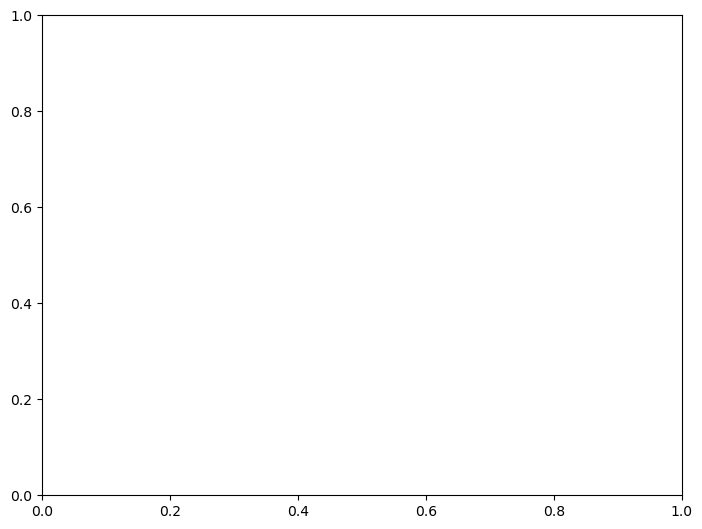

In [12]:
for i, graph in enumerate(padded_graphs):
    print(f"Graph {i + 1}: {graph.num_nodes} nodes, {graph.num_edges} edges")
    draw_graph2(graph, le)

In [13]:
import torch
import torch.optim as optim
import torch.nn as nn

class GraphVAE(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_nodes):
        super(GraphVAE, self).__init__()
        self.num_nodes = num_nodes
        self.in_channels = in_channels
        self.encoder = nn.Sequential(
            GCNConv(in_channels, hidden_channels),
            nn.ReLU(),
            GCNConv(hidden_channels, hidden_channels),
            nn.ReLU()
        )
        self.fc_mu = nn.Linear(hidden_channels, out_channels)
        self.fc_logvar = nn.Linear(hidden_channels, out_channels)
        self.decoder = nn.Sequential(
            nn.Linear(out_channels, hidden_channels),
            nn.ReLU(),
            nn.Linear(hidden_channels, in_channels * num_nodes)  # Output size matches the fixed number of nodes
        )

    def encode(self, x, edge_index, batch):
        x = self.encoder[0](x, edge_index)
        x = self.encoder[1](x)
        x = self.encoder[2](x, edge_index)
        x = self.encoder[3](x)
        x = global_mean_pool(x, batch)  # Pooling to get graph-level embedding
        return self.fc_mu(x), self.fc_logvar(x)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std).to(mu.device)  # Ensure `eps` is on the same device
        return mu + eps * std

    def decode(self, z):
        recon = self.decoder(z)
        recon = recon.view(-1, self.num_nodes, self.in_channels)  # Reshape to (batch_size, num_nodes, in_channels)
        return recon

    def forward(self, x, edge_index, batch):
        mu, logvar = self.encode(x, edge_index, batch)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar



In [15]:
import torch
import torch.optim as optim
import torch.nn as nn
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Assume `padded_graphs` is your list of padded graphs
dataset = padded_graphs
#dataset = graphs

# Create a DataLoader for batching the graphs
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define model parameters
in_channels = dataset[0].num_node_features
hidden_channels = 64
out_channels = 32
num_nodes = max(graph.num_nodes for graph in dataset)

# Initialize the model
model = GraphVAE(in_channels, hidden_channels, out_channels, num_nodes).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.MSELoss()
beta = 1.0  # KL divergence weighting factor

/opt/anaconda3/envs/untitled/lib/python3.8/site-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [16]:
num_epochs = 200
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in dataloader:
        data = data.to(device)
        optimizer.zero_grad()

        # Forward pass
        recon, mu, logvar = model(data.x, data.edge_index, data.batch)

        # Reconstruction loss
        loss_recon = loss_function(recon.view(-1, data.num_nodes, data.num_node_features), data.x.view(-1, data.num_nodes, data.num_node_features))
        # KL divergence loss
        kld = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())
        loss = loss_recon + beta * kld

        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(dataloader)}")

Epoch 1, Loss: 5141.073822021484
Epoch 2, Loss: 1851.33642578125
Epoch 3, Loss: 1826.0050354003906
Epoch 4, Loss: 1785.583251953125
Epoch 5, Loss: 1746.6037902832031
Epoch 6, Loss: 1737.4798583984375
Epoch 7, Loss: 1664.0061340332031
Epoch 8, Loss: 1666.7827453613281
Epoch 9, Loss: 1563.8812866210938
Epoch 10, Loss: 1515.8876037597656
Epoch 11, Loss: 1341.758544921875
Epoch 12, Loss: 1188.2145080566406
Epoch 13, Loss: 980.5093536376953
Epoch 14, Loss: 749.8529205322266
Epoch 15, Loss: 587.2876281738281
Epoch 16, Loss: 510.80745697021484
Epoch 17, Loss: 469.81920623779297
Epoch 18, Loss: 456.6602249145508
Epoch 19, Loss: 398.82328033447266
Epoch 20, Loss: 370.77576446533203
Epoch 21, Loss: 349.0941925048828
Epoch 22, Loss: 352.65211486816406
Epoch 23, Loss: 333.27293395996094
Epoch 24, Loss: 325.53956604003906
Epoch 25, Loss: 311.54756927490234
Epoch 26, Loss: 300.4791793823242
Epoch 27, Loss: 302.5081558227539
Epoch 28, Loss: 305.25294494628906
Epoch 29, Loss: 285.3196487426758
Epoch 3

Epoch 1, Loss: 181.23896026611328
Epoch 2, Loss: 178.84503555297852
Epoch 3, Loss: 190.13604736328125
Epoch 4, Loss: 178.7504425048828
Epoch 5, Loss: 188.22472381591797
Epoch 6, Loss: 194.71295166015625
Epoch 7, Loss: 182.08262634277344
Epoch 8, Loss: 188.79879760742188
Epoch 9, Loss: 183.65814590454102
Epoch 10, Loss: 177.2677345275879
Epoch 11, Loss: 189.3134307861328
Epoch 12, Loss: 186.58033752441406
Epoch 13, Loss: 182.56907653808594
Epoch 14, Loss: 179.98524856567383
Epoch 15, Loss: 188.89027786254883
Epoch 16, Loss: 189.7861557006836
Epoch 17, Loss: 175.26462173461914
Epoch 18, Loss: 190.73497772216797
Epoch 19, Loss: 181.60909271240234
Epoch 20, Loss: 188.29862213134766
Epoch 21, Loss: 195.97832489013672
Epoch 22, Loss: 185.67260360717773
Epoch 23, Loss: 179.03190231323242
Epoch 24, Loss: 208.66402435302734
Epoch 25, Loss: 187.53114318847656
Epoch 26, Loss: 180.9293975830078
Epoch 27, Loss: 189.25419998168945
Epoch 28, Loss: 185.29087448120117
Epoch 29, Loss: 178.57664489746094

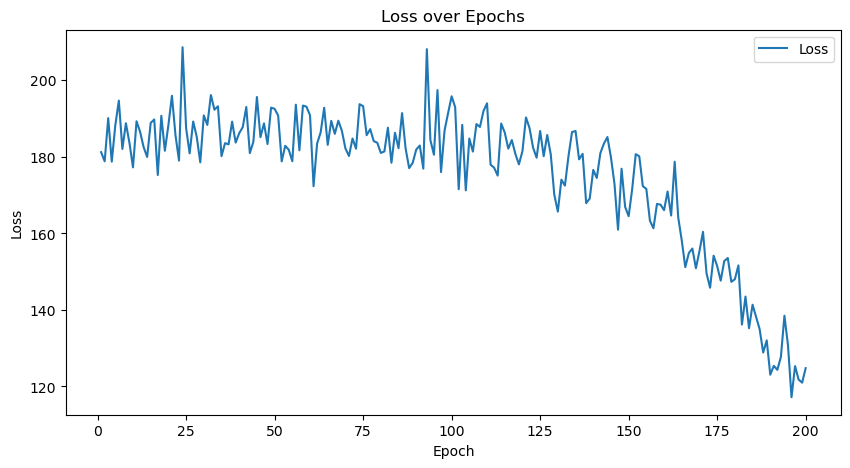

In [17]:

# List to store loss values
loss_values = []

num_epochs = 200
model.train()
for epoch in range(num_epochs):
    total_loss = 0
    for data in dataloader:
        data = data.to(device)
        optimizer.zero_grad()

        # Forward pass
        recon, mu, logvar = model(data.x, data.edge_index, data.batch)

        # Reconstruction loss
        loss_recon = loss_function(recon.view(-1, data.num_nodes, data.num_node_features), data.x.view(-1, data.num_nodes, data.num_node_features))
        # KL divergence loss
        kld = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())
        loss = loss_recon + beta * kld

        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    loss_values.append(avg_loss)
    print(f"Epoch {epoch + 1}, Loss: {avg_loss}")

# Plot the loss values
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), loss_values, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

In [18]:
import torch
from torch_geometric.data import Data

def generate_new_graphs(model, num_graphs, latent_dim, num_nodes, num_node_features):
    model.eval()  # Set the model to evaluation mode
    new_graphs = []

    with torch.no_grad():
        for _ in range(num_graphs):
            # Sample a random latent vector from a standard normal distribution
            z = torch.randn(1, latent_dim).to(device)

            # Decode the latent vector to generate a new graph
            recon = model.decode(z)

            # Convert the reconstructed features back to a PyTorch Geometric graph format
            x = recon.view(num_nodes, num_node_features)  # Ensure the correct shape

            # Generate a realistic edge_index tensor
            edge_index = torch.combinations(torch.arange(num_nodes), r=2).t().contiguous()

            new_graph = Data(x=x, edge_index=edge_index)
            new_graphs.append(new_graph)

    return new_graphs

# Generate 10 new protein graphs with specified dimensions
num_new_graphs = 10
latent_dim = out_channels  # Dimension of the latent space
num_nodes = 21  # Number of nodes
num_node_features = 8  # Number of node features
new_graphs = generate_new_graphs(model, num_new_graphs, latent_dim, num_nodes, num_node_features)

# Print the number of nodes in each generated graph
for i, graph in enumerate(new_graphs):
    print(f"Graph {i + 1}: {graph.x.shape[0]} nodes")

Graph 1: 21 nodes
Graph 2: 21 nodes
Graph 3: 21 nodes
Graph 4: 21 nodes
Graph 5: 21 nodes
Graph 6: 21 nodes
Graph 7: 21 nodes
Graph 8: 21 nodes
Graph 9: 21 nodes
Graph 10: 21 nodes


In [19]:
# Print each node's features for the first graph
first_graph = new_graphs[0]
for i, node_features in enumerate(first_graph.x):
    print(f"Node {i + 1}: {node_features}")

Node 1: tensor([-0.4291,  0.3442, -0.2502,  0.4512,  3.7190, -0.0172,  0.4246, -0.2580])
Node 2: tensor([-0.4542,  0.4909, -0.2878,  0.6650,  4.4536,  0.1207, -0.6035,  0.0728])
Node 3: tensor([-0.7276,  0.4118, -0.3904,  0.3189,  5.0131,  0.0779, -0.1437,  0.3058])
Node 4: tensor([0.0828, 0.3734, 0.2179, 0.2477, 3.1862, 0.8253, 0.2915, 0.0259])
Node 5: tensor([-0.5059,  0.3654, -0.2073,  0.0797,  3.2765,  0.3286,  0.1338, -0.0357])
Node 6: tensor([-0.2614,  0.4551, -0.0649,  1.0475,  4.5258,  0.0936,  0.4397,  0.1128])
Node 7: tensor([-0.4340,  0.2512, -0.1784,  0.4235,  2.2079,  0.0211,  0.1366, -0.1486])
Node 8: tensor([-0.1244,  0.7399, -0.1328,  0.4078,  3.4385, -0.1367,  0.3523,  0.3900])
Node 9: tensor([-0.2461,  0.6260, -0.1256,  0.2324,  4.0376,  0.3332, -0.0587,  0.0253])
Node 10: tensor([ 0.4579, -0.1043,  0.1052,  0.4347,  3.9413,  0.5528, -0.2879, -0.3987])
Node 11: tensor([-0.0250, -0.2014, -0.0996,  0.1876,  3.7100,  0.0924, -0.0923, -0.0792])
Node 12: tensor([-0.1289, -

Number of nodes: 21
Number of edges: 210
Node features shape: torch.Size([21, 8])


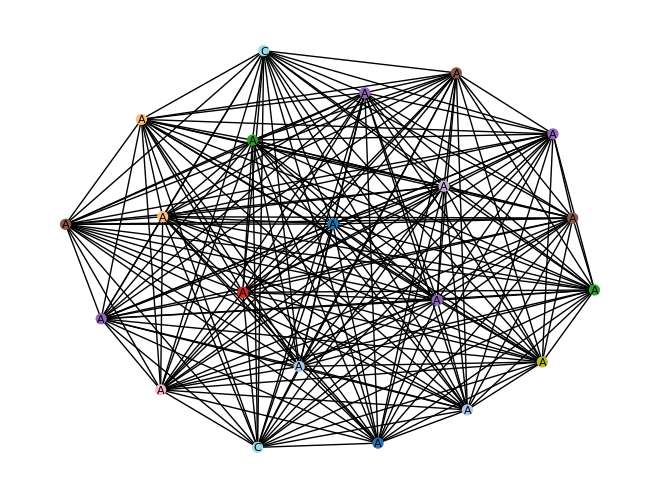

Number of nodes: 21
Number of edges: 210
Node features shape: torch.Size([21, 8])


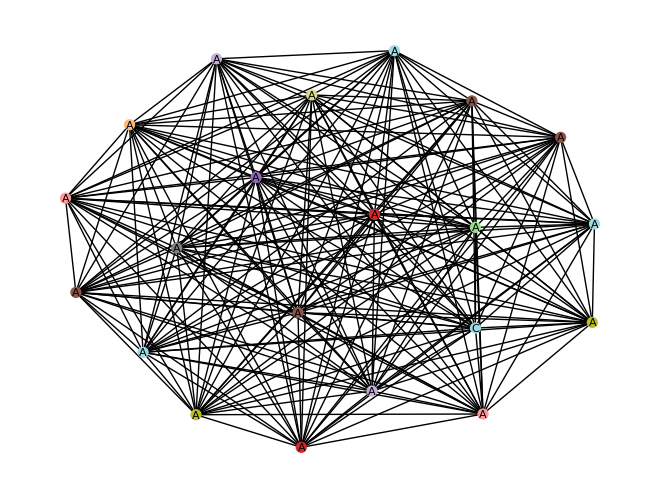

Number of nodes: 21
Number of edges: 210
Node features shape: torch.Size([21, 8])


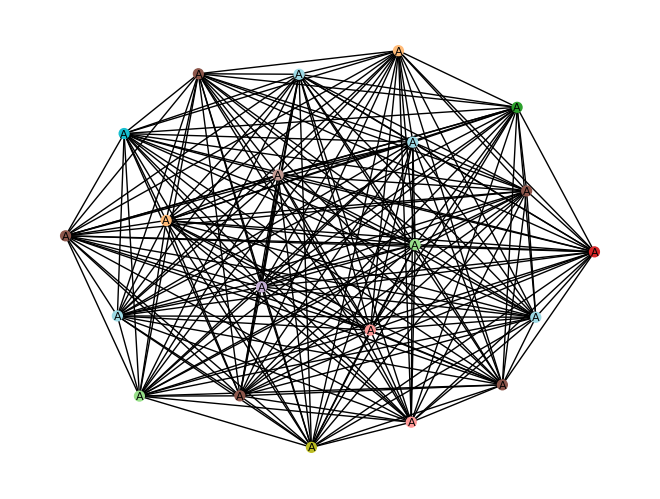

Number of nodes: 21
Number of edges: 210
Node features shape: torch.Size([21, 8])


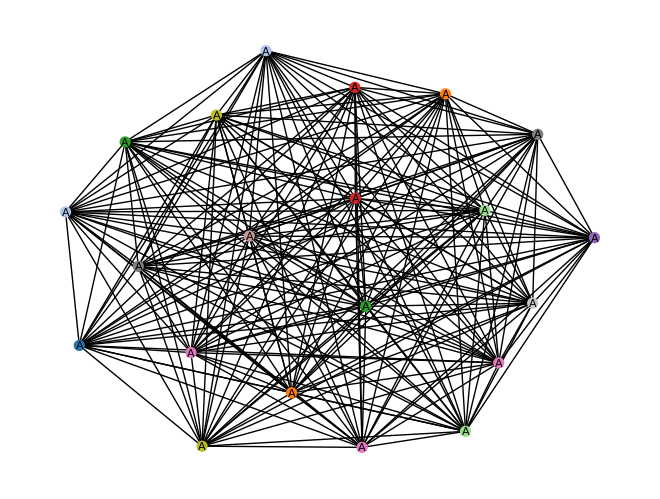

Number of nodes: 21
Number of edges: 210
Node features shape: torch.Size([21, 8])


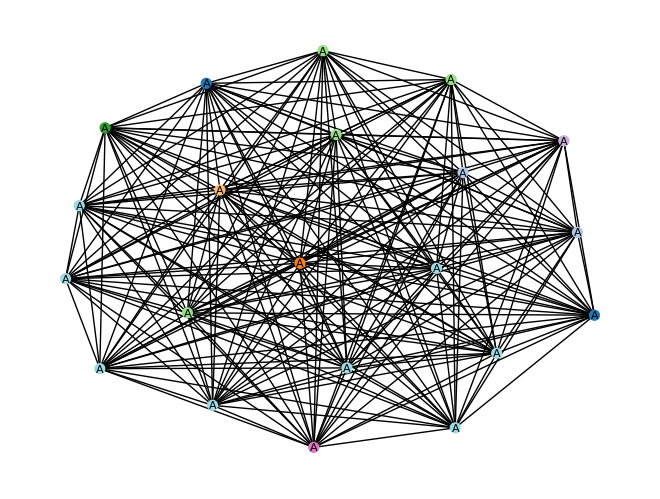

Number of nodes: 21
Number of edges: 210
Node features shape: torch.Size([21, 8])


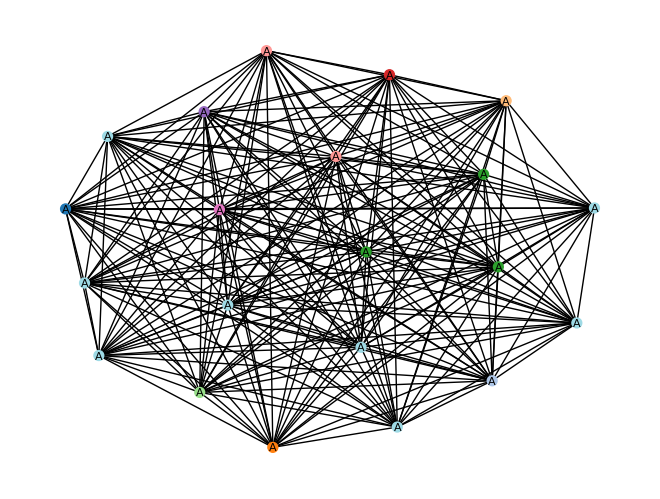

Number of nodes: 21
Number of edges: 210
Node features shape: torch.Size([21, 8])


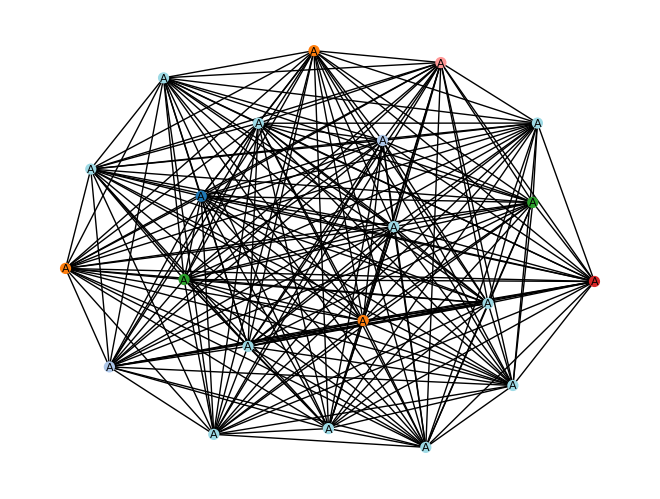

Number of nodes: 21
Number of edges: 210
Node features shape: torch.Size([21, 8])


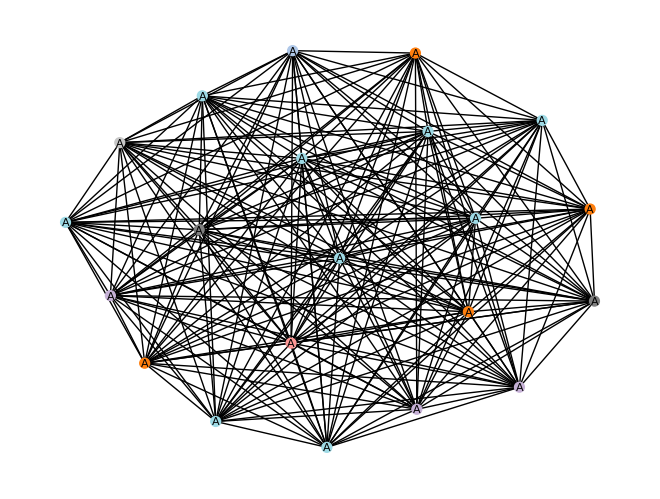

Number of nodes: 21
Number of edges: 210
Node features shape: torch.Size([21, 8])


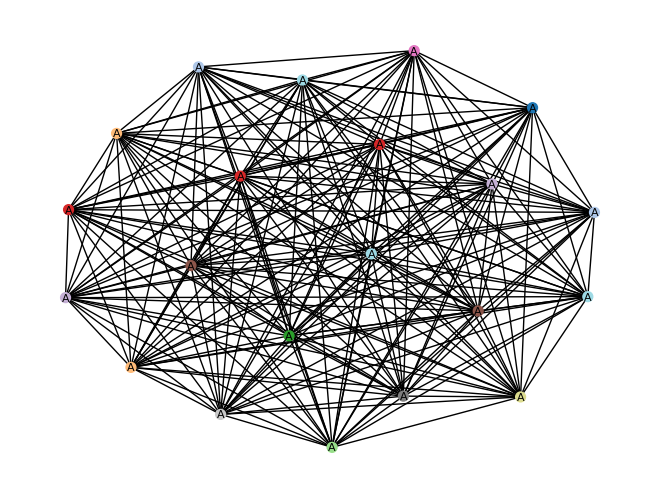

Number of nodes: 21
Number of edges: 210
Node features shape: torch.Size([21, 8])


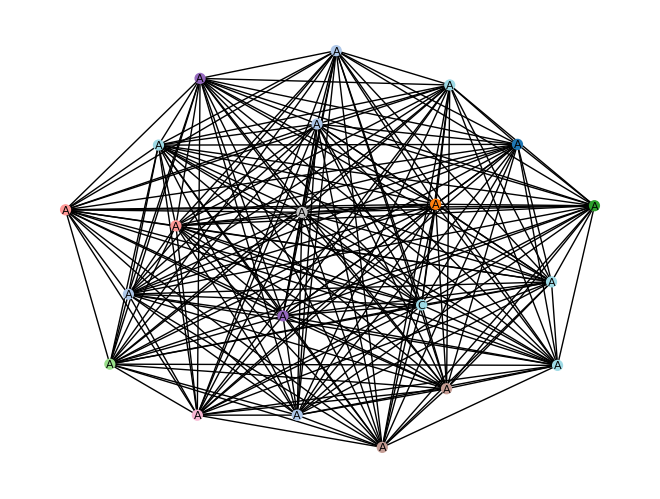

In [20]:
for i, graph in enumerate(new_graphs):
    graph_creator.print_graph_metrics(graph)

    # Draw the graph
    graph_creator.draw_graph(graph, le)
